<a id="1"></a>
# <p style="background-color:#B7B7A4;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:5px 5px;">Importing Libraries</p>

In [204]:
#Importing the Libraries
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from factor_analyzer import FactorAnalyzer
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
# from pandas_profiling import ProfileReport

<a id="2"></a>
# <p style="background-color:#B7B7A4;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:5px 5px;">Loading Data</p>

In [205]:
#Loading the dataset
data = pd.read_csv("customer_segmentation.csv")
print(len(data))

2240


In [206]:
# Drop columns from the 'data' dataframe
data.drop(['Z_CostContact', 'Z_Revenue', 'Response'], axis=1, inplace=True)
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain'],
      dtype='object')

<a id="3"></a>
# <p style="background-color:#B7B7A4;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:10px 10px;">Data Cleaning</p>


In [207]:
#Information on features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [208]:
#To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In [209]:
print("Total categories in the feature education:\n", data["Education"].value_counts(), "\n")

Total categories in the feature education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64 



In [210]:
print("Total categories in the feature marital status:\n", data["Marital_Status"].value_counts(), "\n")

Total categories in the feature marital status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 



In [211]:
# data describe without CLIENTNUM
data.drop("ID", axis=1).describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2216.000000    2216.000000  2216.000000  2216.000000  2216.000000   
mean   1968.820397   52247.251354     0.441787     0.505415    49.012635   
std      11.985554   25173.076661     0.536896     0.544181    28.948352   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35303.000000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68522.000000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2216.000000  2216.000000      2216.000000      2216.000000   
mean    305.091606    26.356047       166.995939        37.637635   
std     337.327920    39.793917       224.283273        54.752082   
min       0.000000     0.000000         0.000000         0.000000   
25%      24.000000     2.000000        16.000000         3.000000   
50%     174.500000     8.000000        68.000000        12.000000   
75%     505.000000    33.000000       232.250000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumWebPurchases  NumCatalogPurchases  \
count       2216.000000  ...      2216.000000          2216.000000   
mean          27.028881  ...         4.085289             2.671029   
std           41.072046  ...         2.740951             2.926734   
min            0.000000  ...         0.000000             0.000000   
25%            1.000000  ...         2.000000             0.000000   
50%            8.000000  ...         4.000000             2.000000   
75%           33.000000  ...         6.000000             4.000000   
max          262.000000  ...        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2216.000000        2216.000000   2216.000000   2216.000000   
mean            5.800993           5.319043      0.073556      0.074007   
std             3.250785           2.425359      0.261106      0.261842   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  
count   2216.000000   2216.000000   2216.000000  2216.000000  
mean       0.073105      0.064079      0.013538     0.009477  
std        0.260367      0.244950      0.115588     0.096907  
min        0.000000      0.000000      0.000000     0.000000  
25%        0.000000      0.000000      0.000000     0.000000  
50%        0.000000      0.000000      0.000000     0.000000  
75%        0.000000      0.000000      0.000000     0.000000  
max        1.000000      1.000000      1.000000     1.000000  

[8 rows x 22 columns]

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 200x200 with 0 Axes>

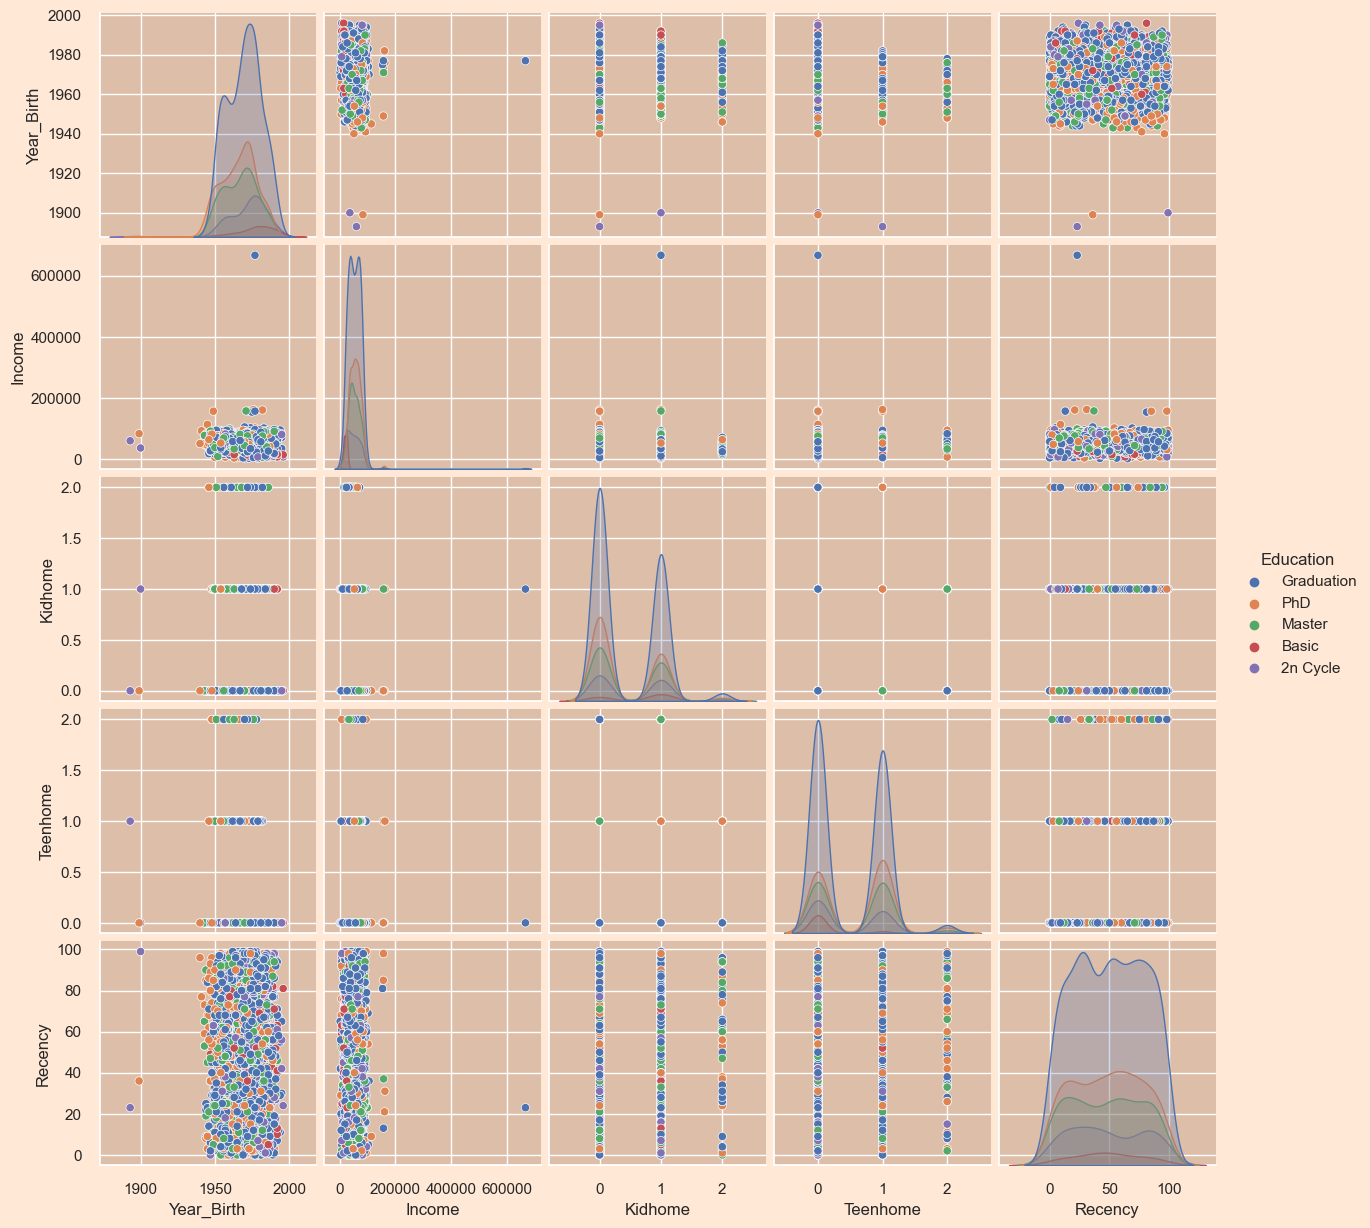

In [212]:
#To plot some selected features
#Setting up colors prefrences

# Set the style and background color
sns.set(rc={"axes.facecolor":"#DDBEA9","figure.facecolor":"#FFE8D6"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
# cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

#Plotting following features
To_Plot = ["Year_Birth", "Income", "Kidhome", "Teenhome", "Recency", "Education"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure(figsize=(2, 2))
sns.pairplot(data[To_Plot], hue= "Education")

#Taking hue
plt.show()

In [213]:
#Visualization of outlier values

fig=make_subplots(rows=2,cols=1,subplot_titles=('<i>Year_Birth', '<i>Income'))
fig.add_trace(go.Box(x=data['Year_Birth'],name='Year_Birth'),row=1,col=1)
fig.add_trace(go.Box(x=data['Income'],name='Income'),row=2,col=1)

fig.update_yaxes(visible=False, showticklabels=False)
fig.update_layout(height=600, width=1000, title_text='<b>Box Plots to Check Outliers', font_size=13)
fig.update_layout(template='plotly_white', title_x=0.5, font_family='Courier New', showlegend=False)

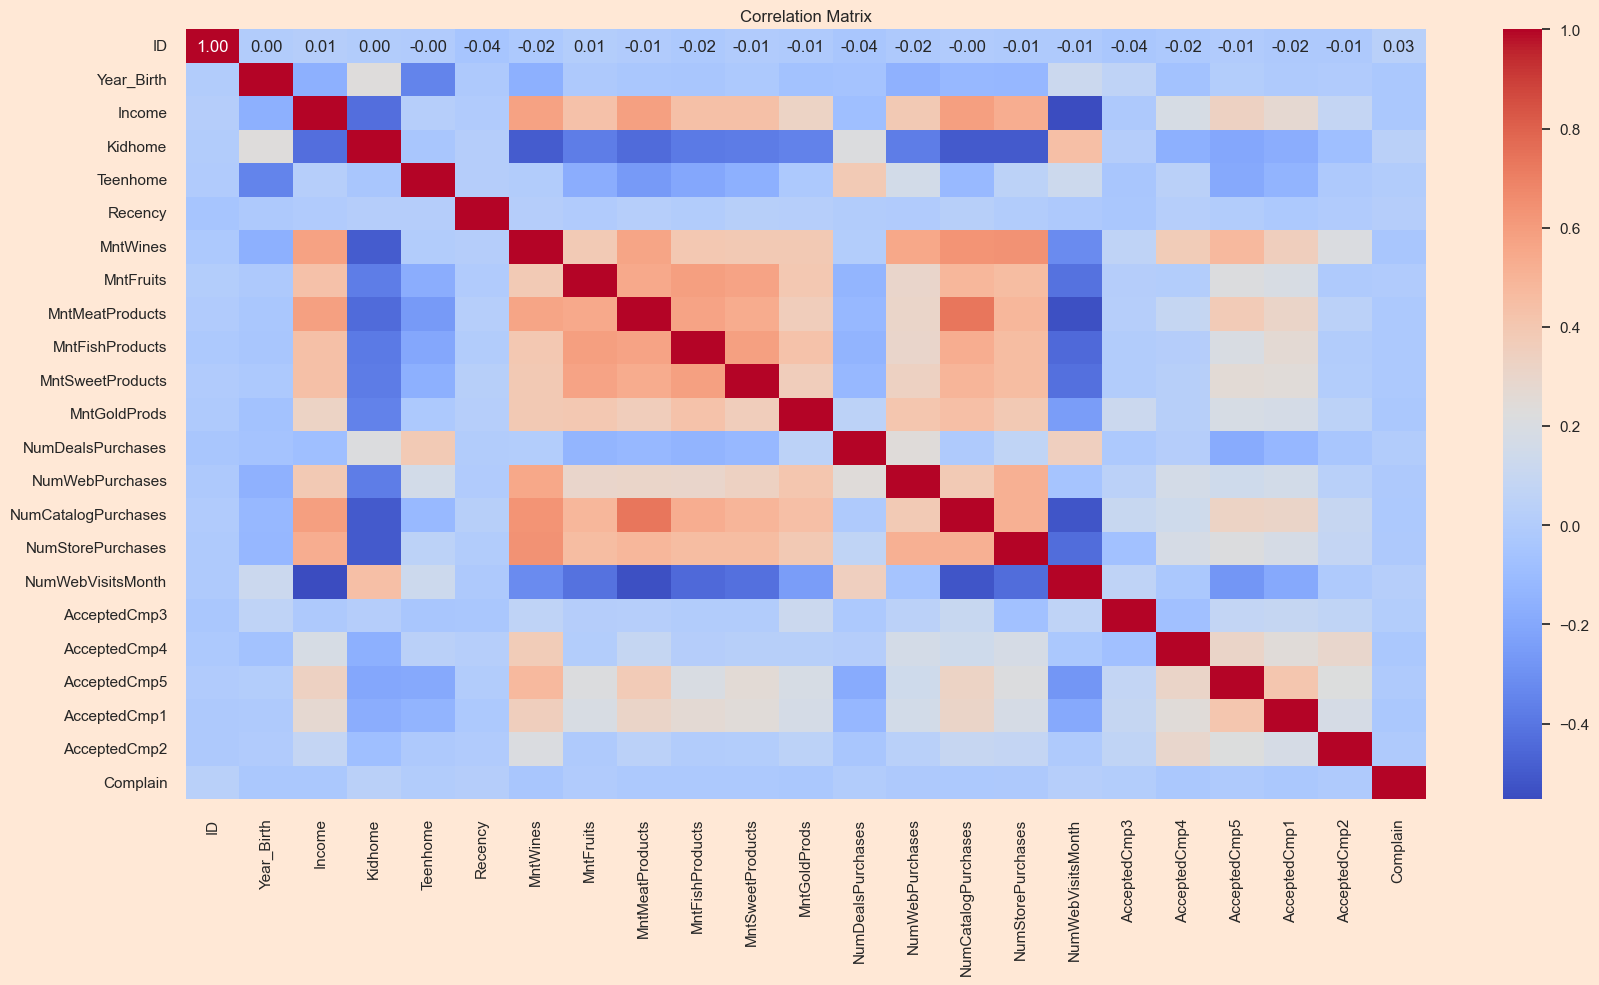

In [214]:
sub = data.select_dtypes(include=[np.number]).columns
data_copy = data[sub].copy()
corr = data_copy.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [215]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
dtype: object

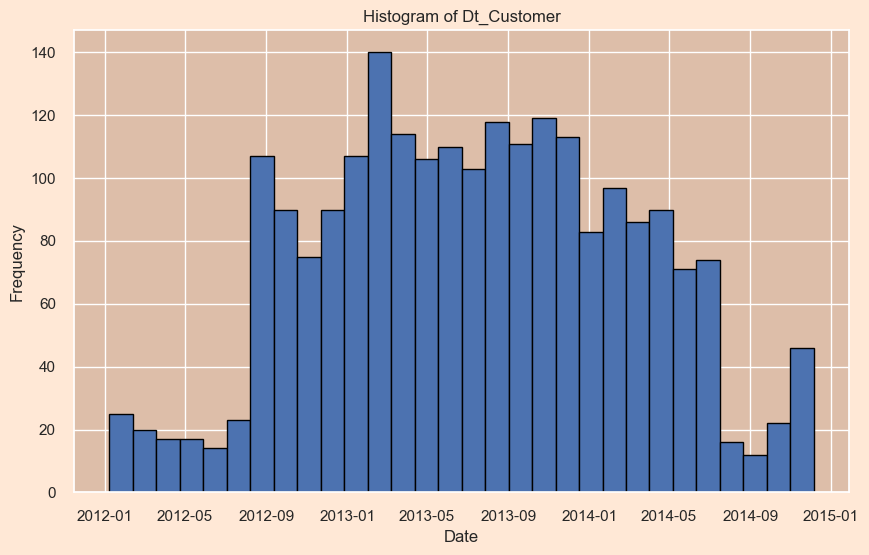

In [216]:
# Convert "Dt_Customer" column to datetime format
data_date = data['Dt_Customer']
data_date = pd.to_datetime(data_date)


# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data_date, bins=30, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Dt_Customer')
plt.show()

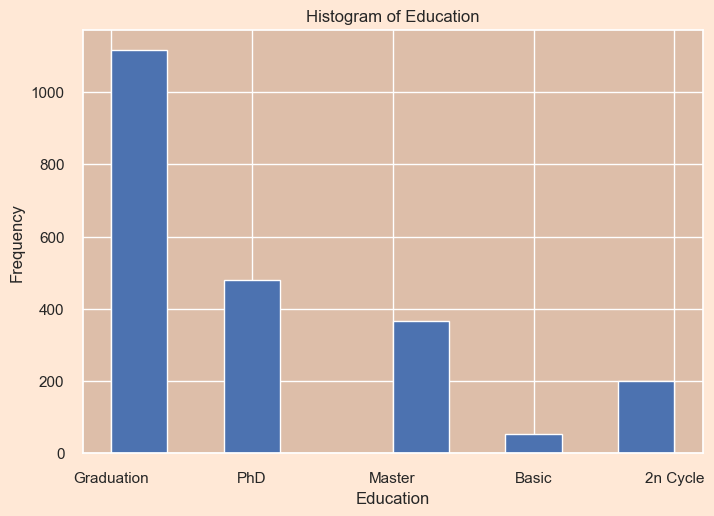

In [217]:
plt.hist(data['Education'])
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Histogram of Education')
plt.show()

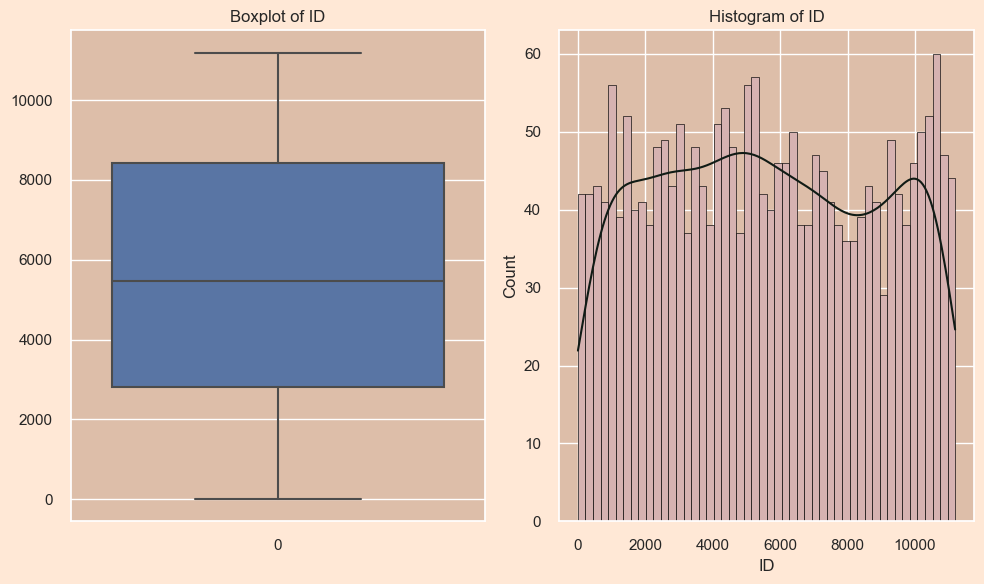

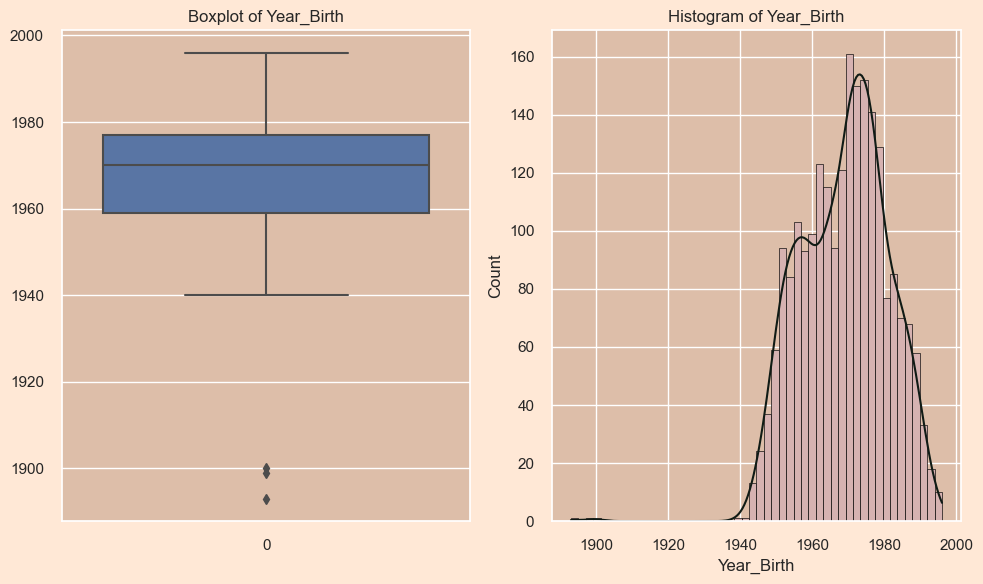

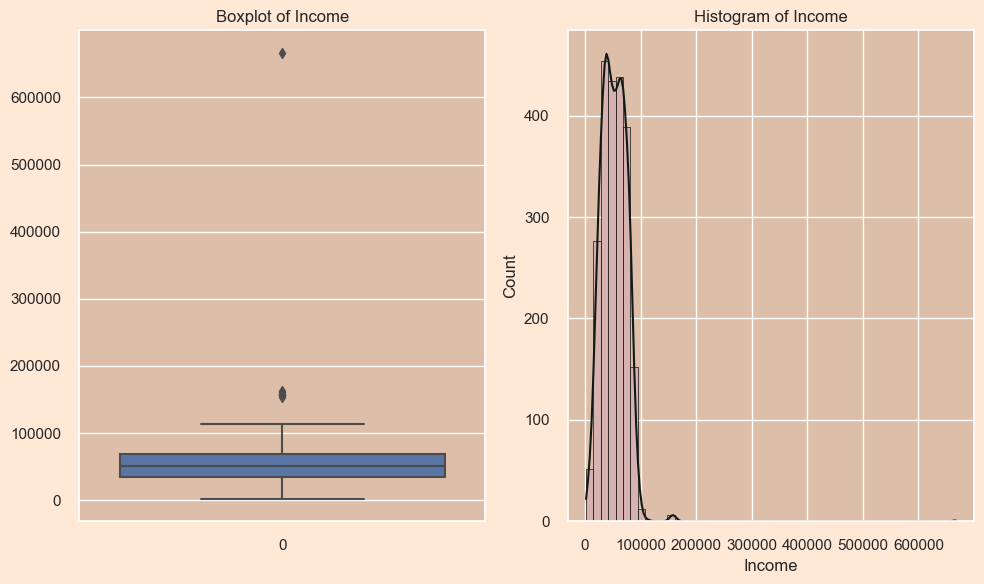

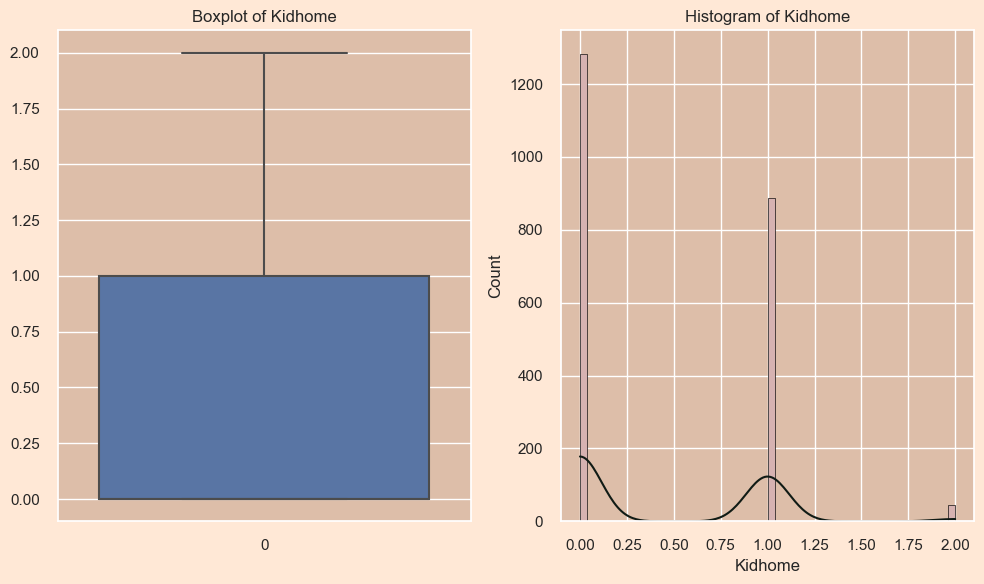

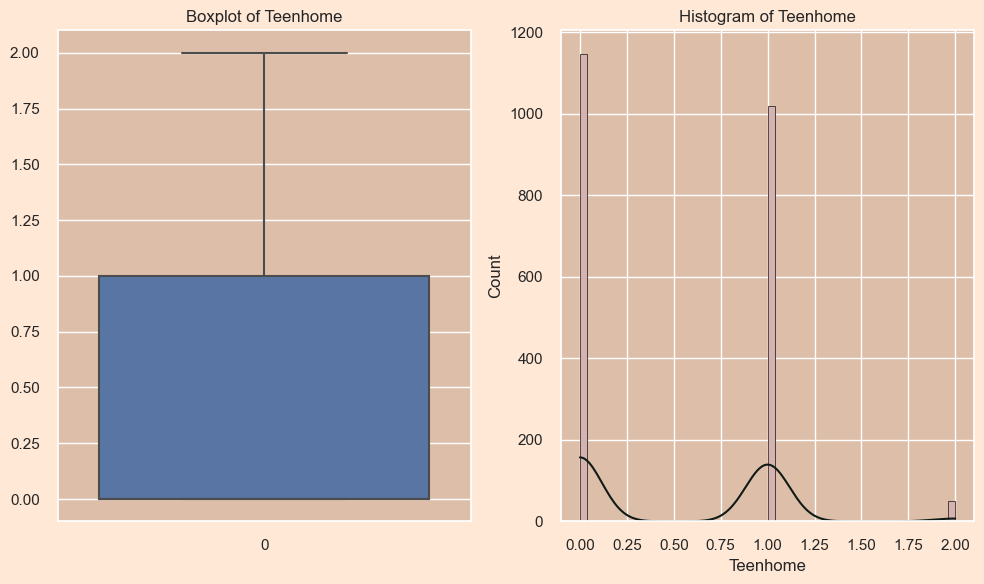

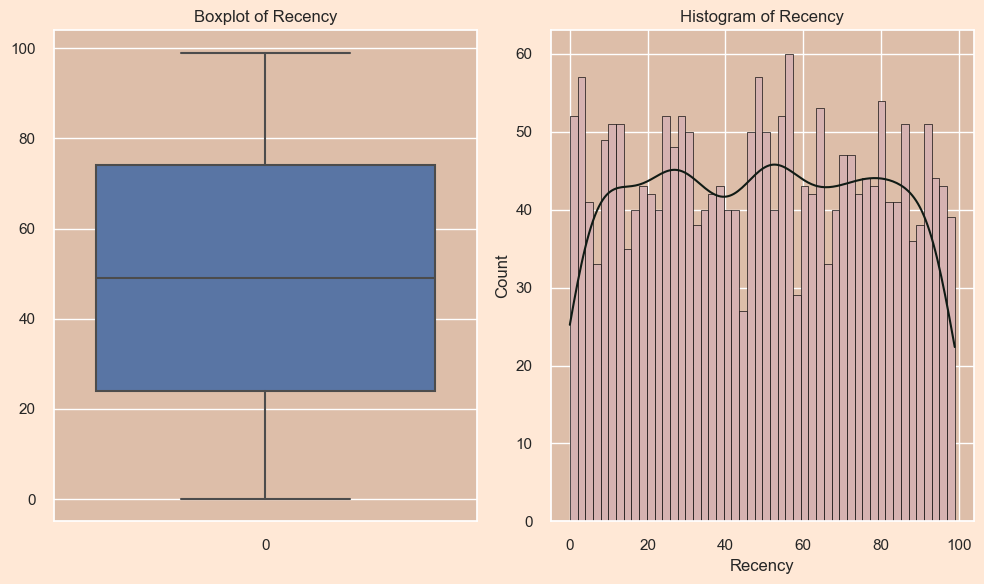

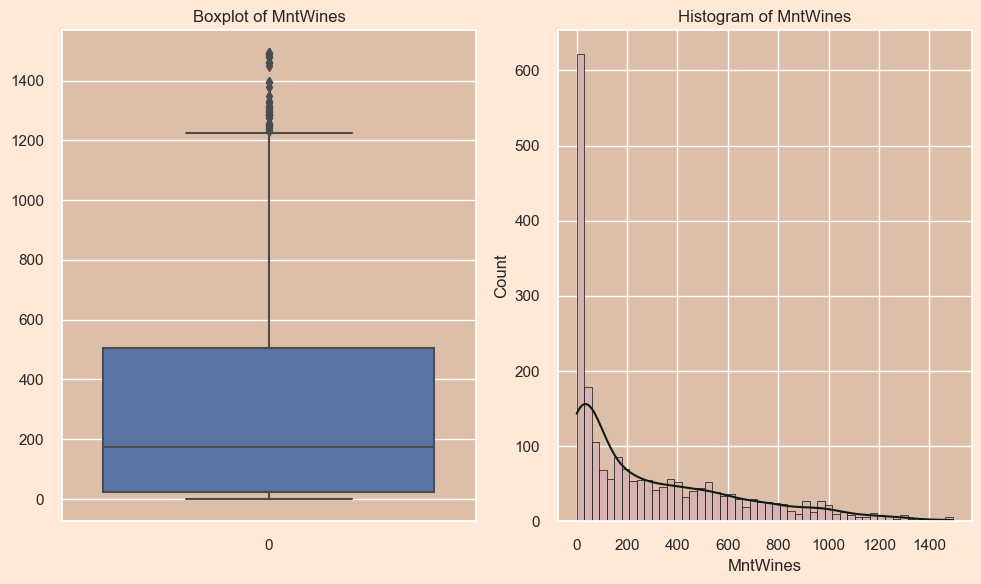

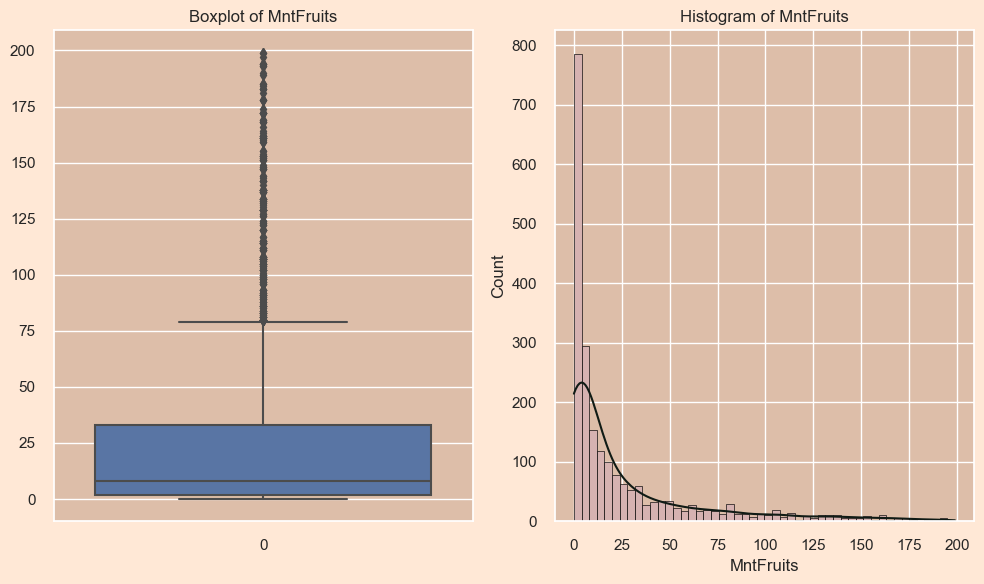

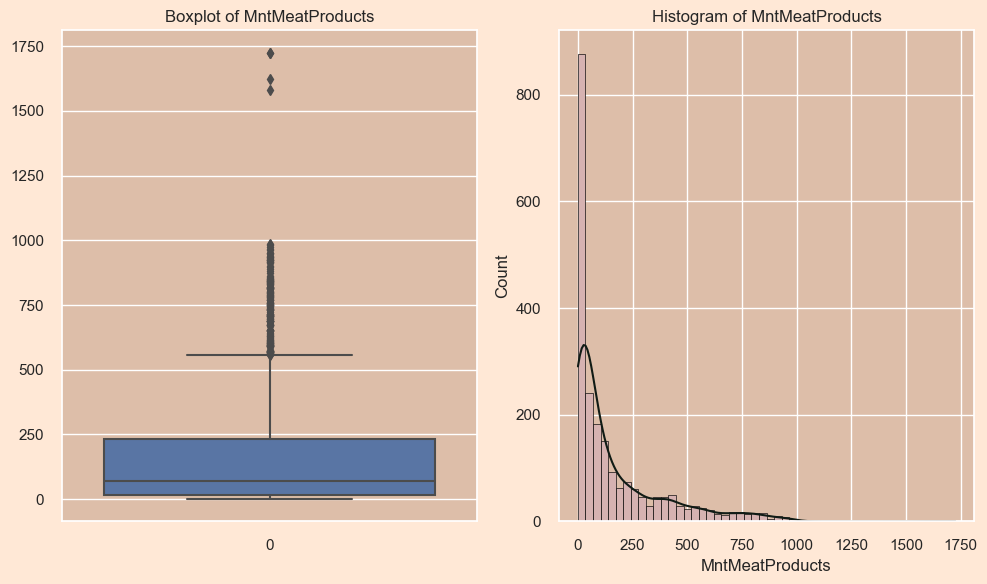

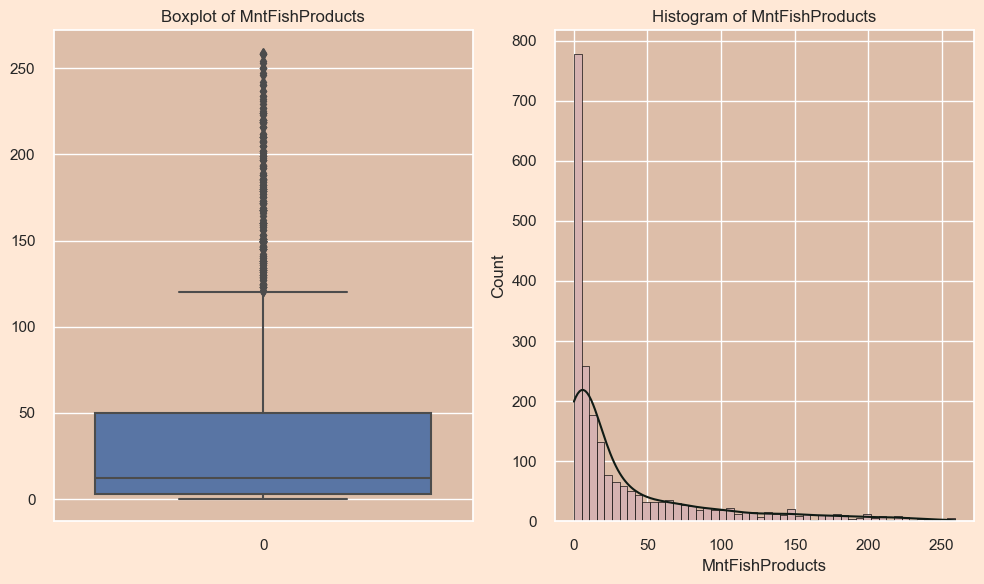

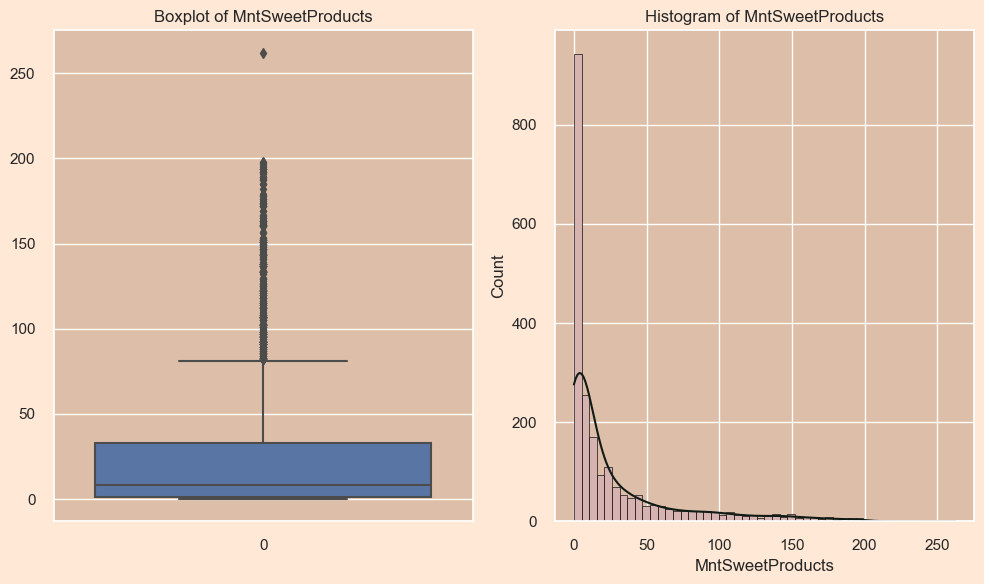

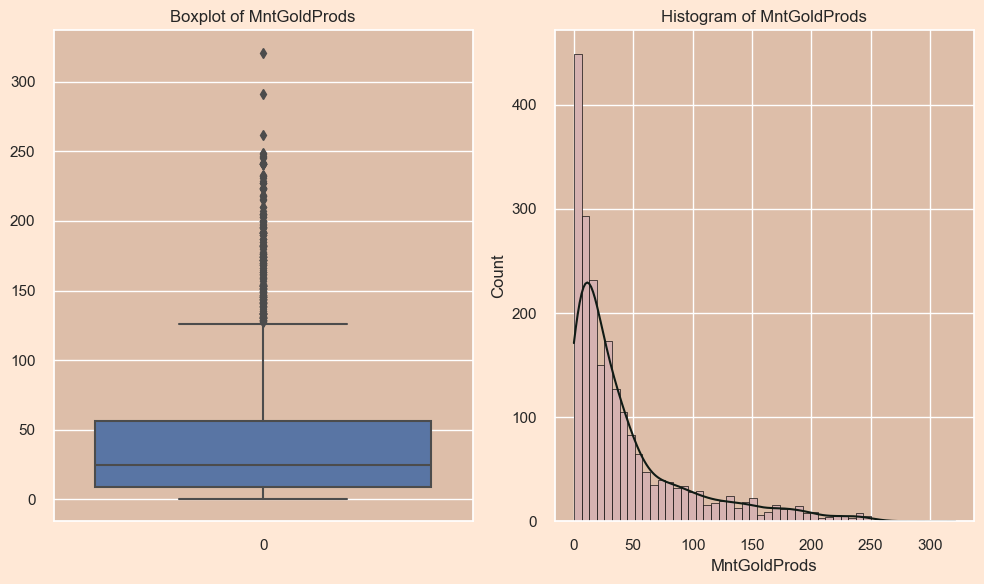

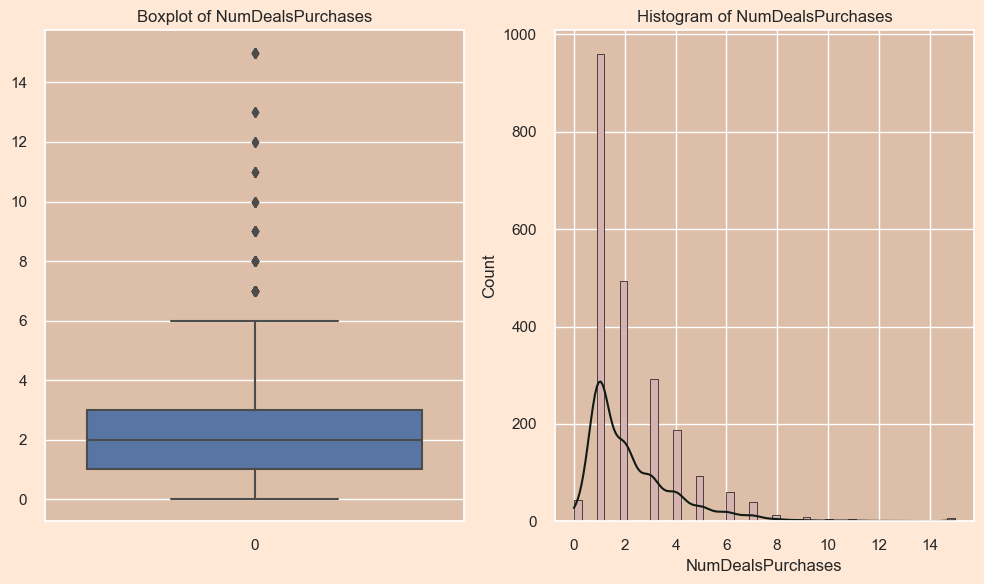

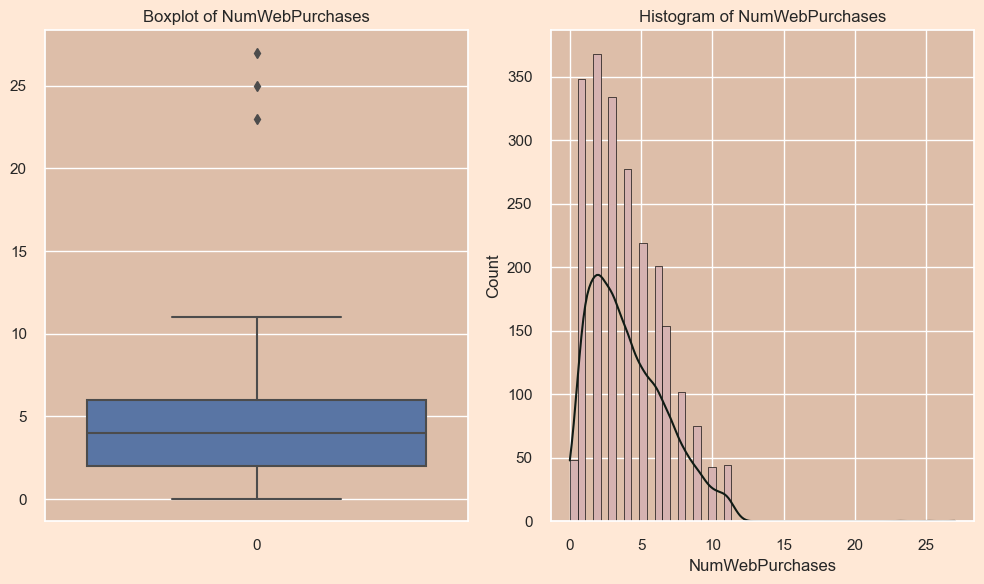

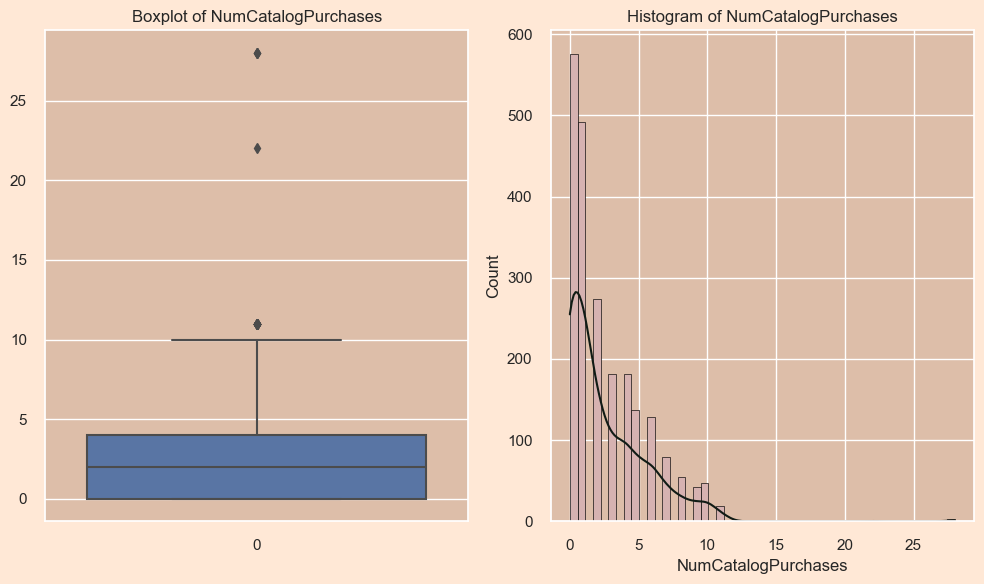

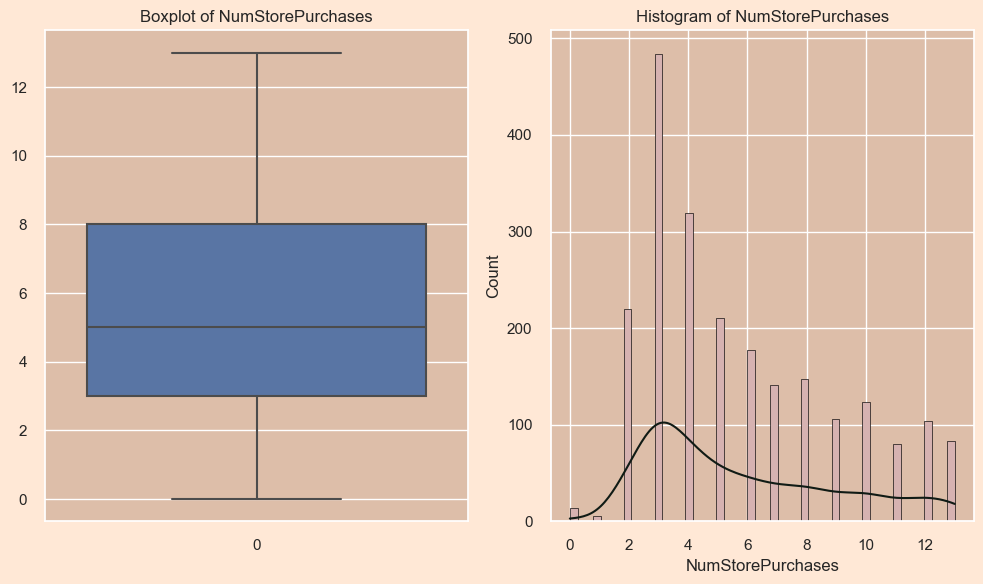

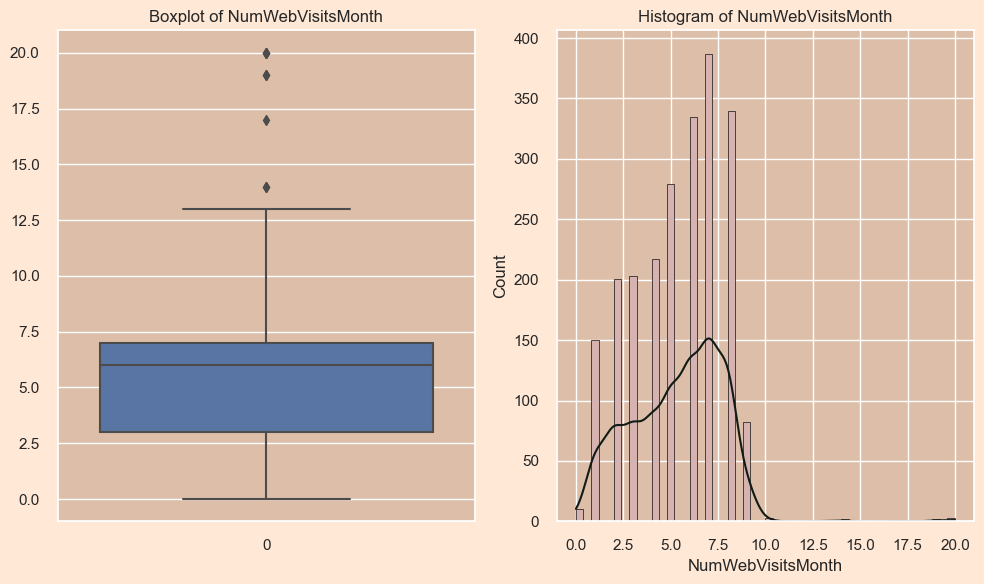

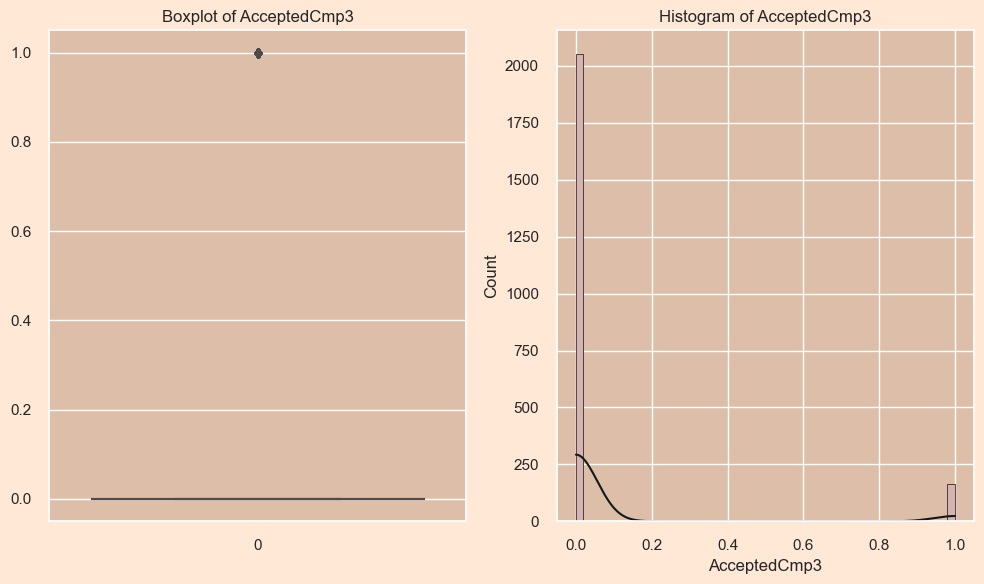

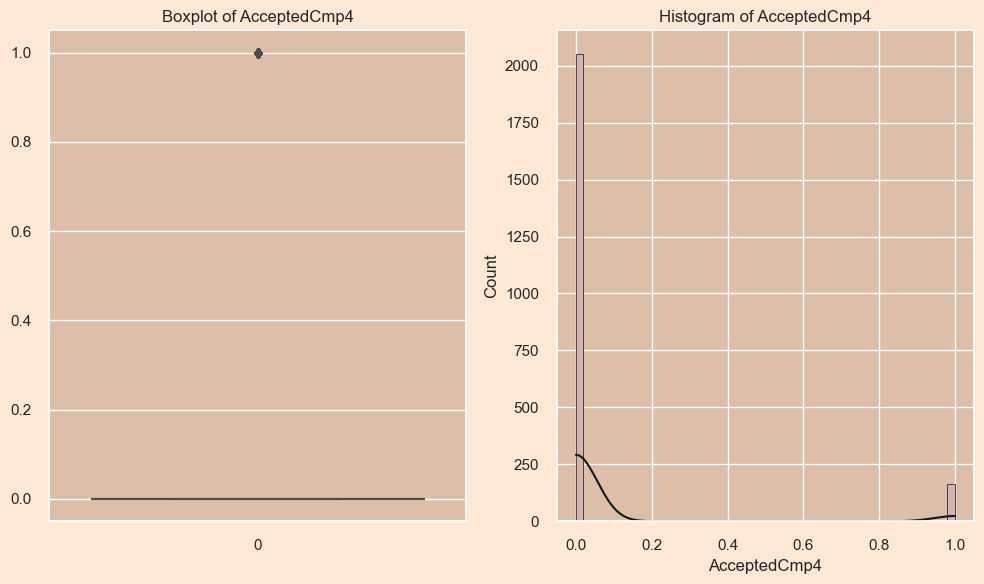

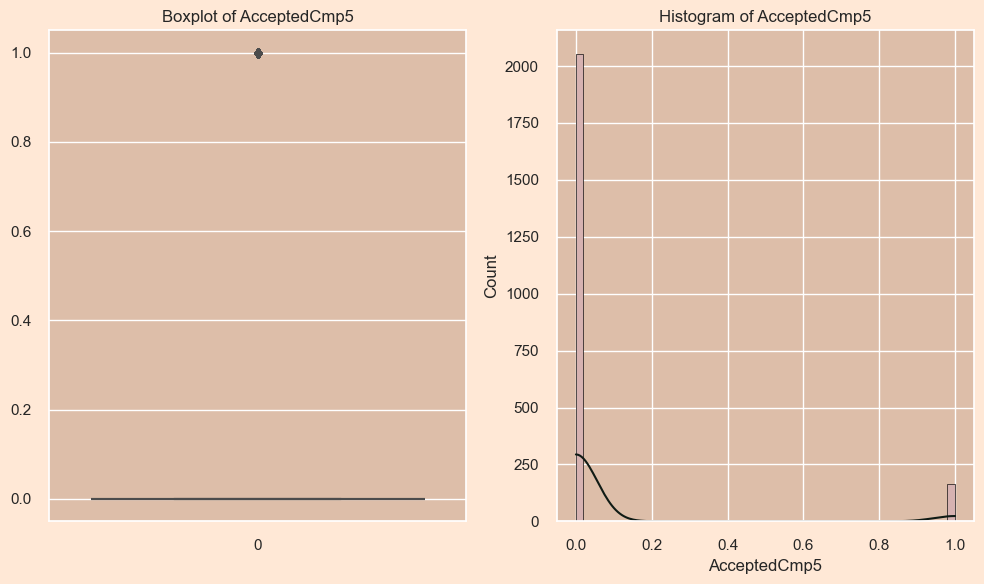

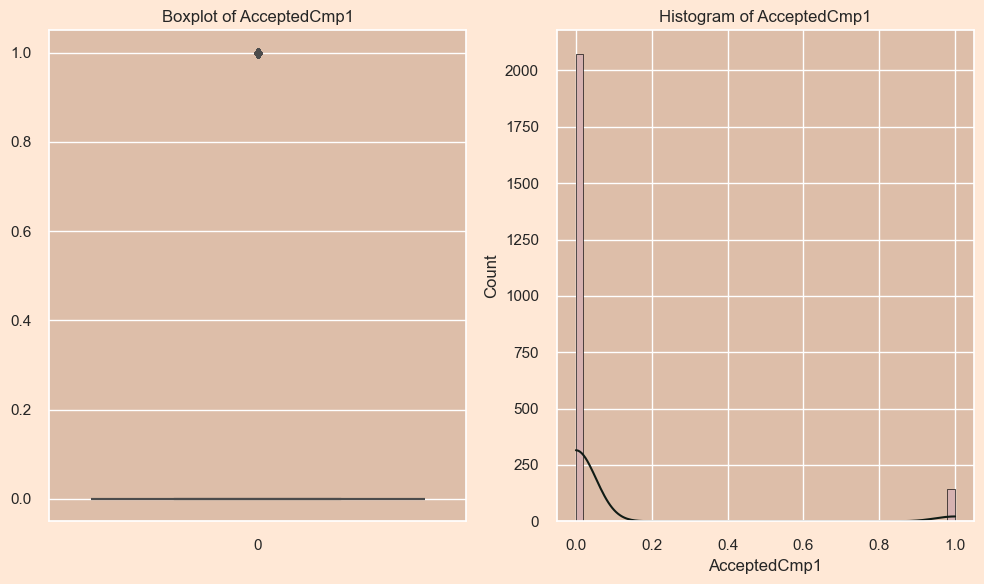

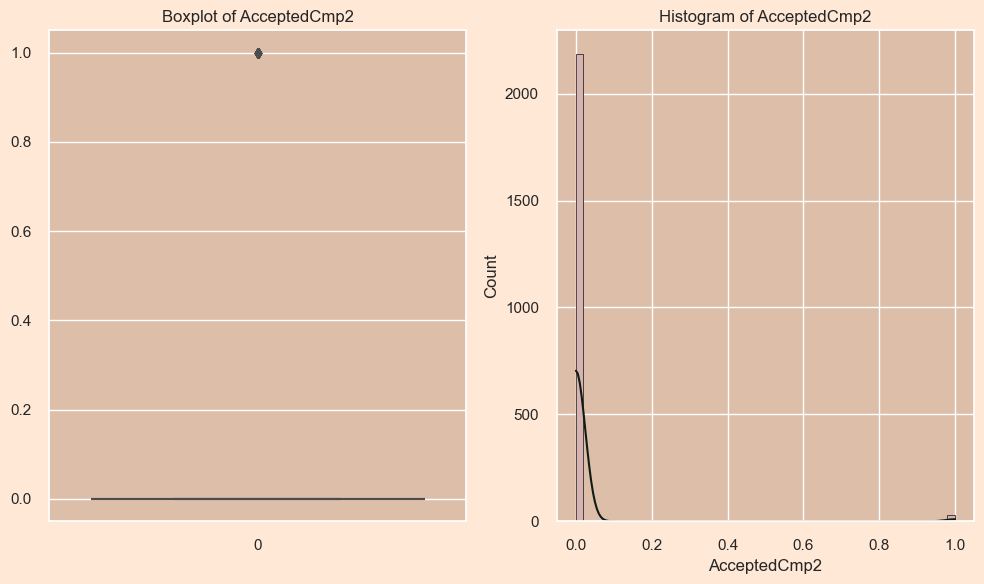

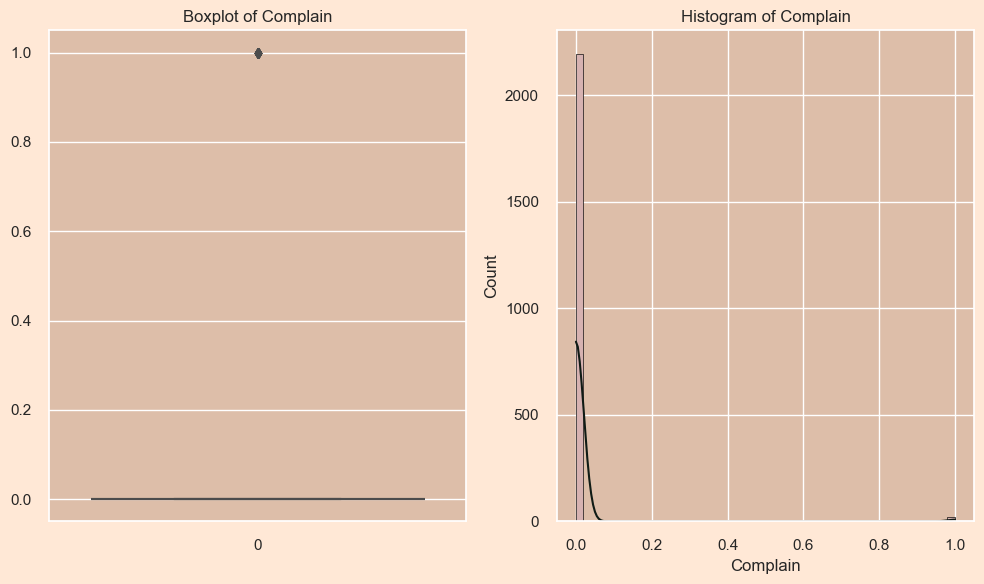

In [218]:
import seaborn as sns

import matplotlib.pyplot as plt

# Boxplot and histplot for each variable
for var in data.columns:
    if data[var].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 6))
        
        # Boxplot
        plt.subplot(1, 2, 1)
        sns.boxplot(data[var])
        plt.title(f'Boxplot of {var}')
        
        # Histplot
        plt.subplot(1, 2, 2)
        p = sns.histplot(data[var], color="#D6B2B1", kde=True, bins=50, alpha=1, fill=True, edgecolor="black")
        p.axes.lines[0].set_color("#101B15")
        plt.title(f'Histogram of {var}')
        
        plt.tight_layout()
        plt.show()


In [219]:
data = data[data['Year_Birth'] >= 1940]
data = data[data['Income'] <= 150000]
data = data[(data['Marital_Status'] != 'Absurd') & (data['Marital_Status'] != 'YOLO')]
data = data[(data['Education'] != 'Basic')]

data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebPurchases  NumCatalogPurchases  \
0  04-09-2012       58       635  ...                8                   10   
1  08-03-2014       38        11  ...                1                    1   
2  21-08-2013       26       426  ...                8                    2   
3  10-02-2014       26        11  ...                2                    0   
4  19-01-2014       94       173  ...                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  
0             0             0             0         0  
1             0             0             0         0  
2             0             0             0         0  
3             0             0             0         0  
4             0             0             0         0  

[5 rows x 26 columns]

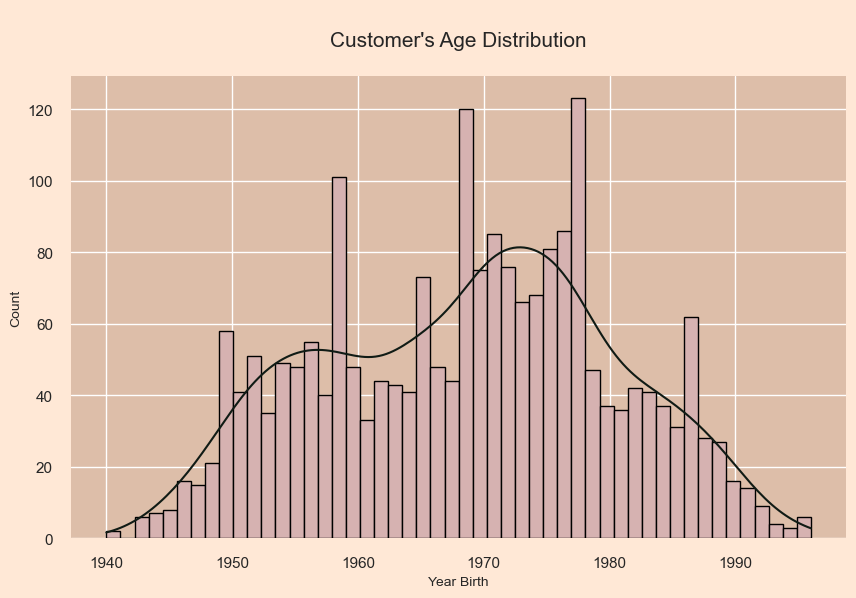

In [220]:
plt.subplots(figsize=(10, 6))
p = sns.histplot(data["Year_Birth"],color="#D6B2B1",kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color("#101B15")
p.axes.set_title("\nCustomer's Age Distribution\n",fontsize=15)
plt.ylabel("Count",fontsize=10)
plt.xlabel("Year Birth",fontsize=10)
sns.despine(left=True, bottom=True)

plt.show()

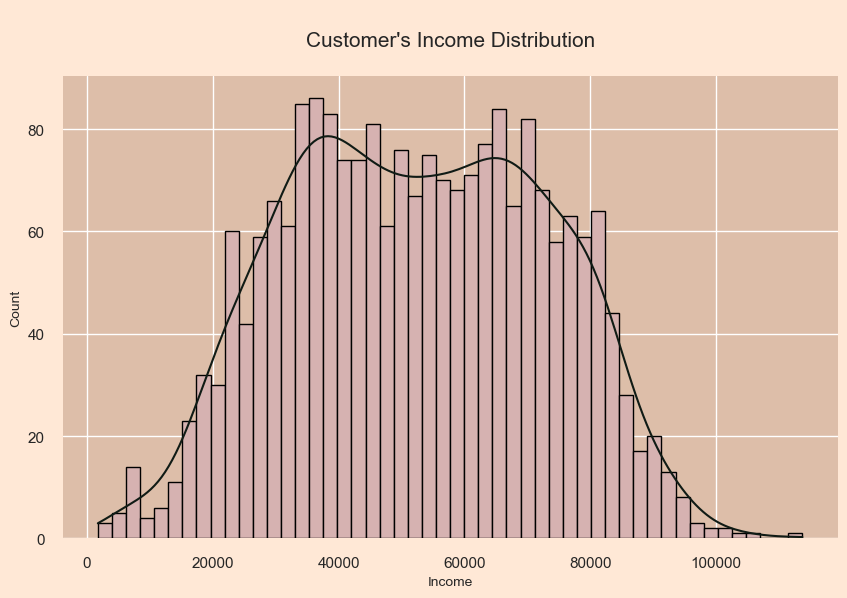

In [221]:
plt.subplots(figsize=(10, 6))
p = sns.histplot(data["Income"], color="#D6B2B1", kde=True, bins=50, alpha=1, fill=True, edgecolor="black")
p.axes.lines[0].set_color("#101B15")
p.axes.set_title("\nCustomer's Income Distribution\n", fontsize=15)
plt.ylabel("Count", fontsize=10)
plt.xlabel("Income", fontsize=10)
sns.despine(left=True, bottom=True)

plt.show()

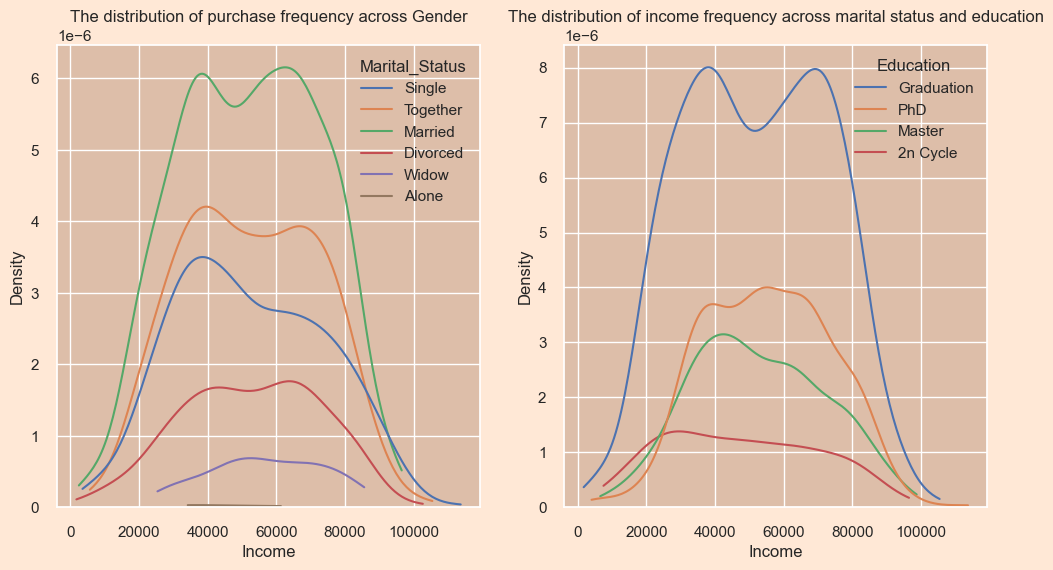

In [222]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.kdeplot(data=data, x="Income", hue="Marital_Status", cut=0, ax=axes[0])
axes[0].set_title("The distribution of purchase frequency across Gender")

sns.kdeplot(data=data, x="Income", hue="Education", cut=0, ax=axes[1])
axes[1].set_title("The distribution of income frequency across marital status and education")

plt.show()

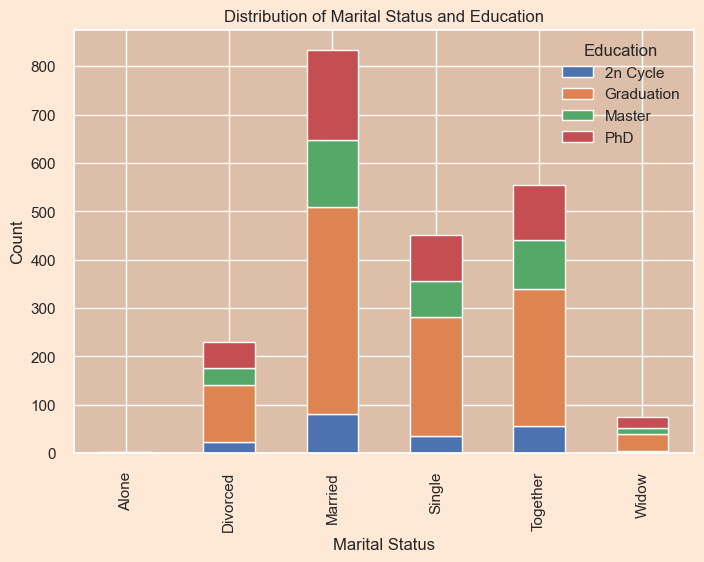

In [223]:
# Count the occurrences of each combination of gender and income category
cross_tab = pd.crosstab(data['Marital_Status'], data['Education'])

# Plot the stacked bar plot
cross_tab.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status and Education')

# Show the plot
plt.show()

In [224]:
# create a copy of the data
data_copy = data.copy()
data_copy.dropna(inplace=True)

The data is quite clean and the new features have been included. I will proceed to the next step. That is, preprocessing the data.

<a id="4"></a>
# <p style="background-color:#B7B7A4;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:5px 5px;">Data Preprocessing</p>

In this section, I will be preprocessing the data to perform clustering operations.

**The following steps are applied to preprocess the data:**

* Label encoding the categorical features
* Scaling the features using the standard scaler
* Creating a subset dataframe for dimensionality reduction

In [225]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status', 'Dt_Customer']


In [226]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


In [227]:
#Creating a copy of data
ds = data.copy()

# creating a subset of dataframe by dropping the features on deals accepted and promotions
# cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
# ds = ds.drop(cols_del, axis=1)

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
scaled_ds = scaled_ds.drop("ID", axis=1)
print("All features are now scaled")

All features are now scaled


In [228]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Year_Birth  Education  Marital_Status    Income   Kidhome  Teenhome  \
0   -1.004719  -0.553984        0.259508  0.282419 -0.815224 -0.948315   
1   -1.262791  -0.553984        0.259508 -0.297402  1.044804  0.885948   
2   -0.316529  -0.553984        1.192779  0.944882 -0.815224 -0.948315   
3    1.317923  -0.553984        1.192779 -1.265802  1.044804 -0.948315   
4    1.059852   1.583310       -0.673764  0.290039  1.044804 -0.948315   

   Dt_Customer   Recency  MntWines  MntFruits  ...  NumWebPurchases  \
0    -1.306484  0.308424  0.949407   1.527724  ...         1.404148   
1    -0.897936 -0.381749 -0.894000  -0.642462  ...        -1.151615   
2     0.614222 -0.795853  0.331984   0.554882  ...         1.404148   
3    -0.675092 -0.795853 -0.894000  -0.567628  ...        -0.786506   
4     0.327708  1.550736 -0.415423   0.405214  ...         0.308821   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0             2.601874          -0.584555           0.703286     -0.280882   
1            -0.604504          -1.200677          -0.123860     -0.280882   
2            -0.248240           1.263810          -0.537433     -0.280882   
3            -0.960768          -0.584555           0.289713     -0.280882   
4             0.108024           0.031567          -0.123860     -0.280882   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  
0     -0.287581     -0.283766     -0.265121     -0.119042 -0.096969  
1     -0.287581     -0.283766     -0.265121     -0.119042 -0.096969  
2     -0.287581     -0.283766     -0.265121     -0.119042 -0.096969  
3     -0.287581     -0.283766     -0.265121     -0.119042 -0.096969  
4     -0.287581     -0.283766     -0.265121     -0.119042 -0.096969  

[5 rows x 25 columns]

<a id="7"></a>
# <p style="background-color:#B7B7A4;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:5px 5px;">Feature Selection</p>


In [229]:
scaled_ds_copy = scaled_ds.copy()

In [230]:
# Generate synthetic dataset
n_clusters = 3

from sklearn.cluster import KMeans

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_ds)

# Add cluster labels to the DataFrame
scaled_ds_copy['Cluster'] = kmeans.labels_
scaled_ds_copy.head()

Year_Birth  Education  Marital_Status    Income   Kidhome  Teenhome  \
0   -1.004719  -0.553984        0.259508  0.282419 -0.815224 -0.948315   
1   -1.262791  -0.553984        0.259508 -0.297402  1.044804  0.885948   
2   -0.316529  -0.553984        1.192779  0.944882 -0.815224 -0.948315   
3    1.317923  -0.553984        1.192779 -1.265802  1.044804 -0.948315   
4    1.059852   1.583310       -0.673764  0.290039  1.044804 -0.948315   

   Dt_Customer   Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0    -1.306484  0.308424  0.949407   1.527724  ...             2.601874   
1    -0.897936 -0.381749 -0.894000  -0.642462  ...            -0.604504   
2     0.614222 -0.795853  0.331984   0.554882  ...            -0.248240   
3    -0.675092 -0.795853 -0.894000  -0.567628  ...            -0.960768   
4     0.327708  1.550736 -0.415423   0.405214  ...             0.108024   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0          -0.584555           0.703286     -0.280882     -0.287581   
1          -1.200677          -0.123860     -0.280882     -0.287581   
2           1.263810          -0.537433     -0.280882     -0.287581   
3          -0.584555           0.289713     -0.280882     -0.287581   
4           0.031567          -0.123860     -0.280882     -0.287581   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Cluster  
0     -0.283766     -0.265121     -0.119042 -0.096969        2  
1     -0.283766     -0.265121     -0.119042 -0.096969        1  
2     -0.283766     -0.265121     -0.119042 -0.096969        0  
3     -0.283766     -0.265121     -0.119042 -0.096969        1  
4     -0.283766     -0.265121     -0.119042 -0.096969        0  

[5 rows x 26 columns]

In [231]:
# Calculate the overall variance of each feature
overall_variance = scaled_ds_copy.var()

# Calculate the variance of each feature within each cluster
cluster_variance = scaled_ds_copy.groupby('Cluster').var()

# Calculate the mean variance within clusters
mean_cluster_variance = cluster_variance.mean()

# Calculate feature importance as the difference between overall variance and mean cluster variance
feature_importance = overall_variance - mean_cluster_variance
feature_importance = feature_importance.drop('Cluster')  # Exclude the cluster label

# Sort features by importance
important_features = feature_importance.sort_values(ascending=False)
important_features


Income                 0.724962
MntMeatProducts        0.555342
NumCatalogPurchases    0.545249
Kidhome                0.482122
NumStorePurchases      0.479190
MntWines               0.454061
NumWebVisitsMonth      0.406650
NumWebPurchases        0.395158
MntFishProducts        0.340741
Teenhome               0.322260
MntSweetProducts       0.273303
MntFruits              0.263658
NumDealsPurchases      0.216490
MntGoldProds           0.136852
Complain               0.088500
Year_Birth             0.036821
Education              0.019507
Recency               -0.001004
Marital_Status        -0.006606
AcceptedCmp3          -0.007696
Dt_Customer           -0.007785
AcceptedCmp5          -0.046671
AcceptedCmp1          -0.111122
AcceptedCmp4          -0.127447
AcceptedCmp2          -0.214971
dtype: float64

In [232]:
# Select top N important features (e.g., top 5)
top_n = 6
selected_features = important_features.head(top_n).index

# Create a new DataFrame with only the selected features
df_selected = scaled_ds_copy[selected_features]
df_selected.head()


Income  MntMeatProducts  NumCatalogPurchases   Kidhome  \
0  0.282419         1.719976             2.601874 -0.815224   
1 -0.297402        -0.744646            -0.604504  1.044804   
2  0.944882        -0.192388            -0.248240 -0.815224   
3 -1.265802        -0.680748            -0.960768  1.044804   
4  0.290039        -0.233465             0.108024  1.044804   

   NumStorePurchases  MntWines  
0          -0.584555  0.949407  
1          -1.200677 -0.894000  
2           1.263810  0.331984  
3          -0.584555 -0.894000  
4           0.031567 -0.415423

In [233]:
df_feature_selected_non_scaled = data[selected_features]

# top features :

3 cluster : Kidhome	Income	NumStorePurchases	MntWines	NumCatalogPurchases

4 cluster : Kidhome	Income  NumCatalogPurchases MntWines    NumStorePurchases		

5 cluster : Teenhome	MntWines	NumCatalogPurchases	NumStorePurchases	Income

# EXPLORATORY FACTOR ANALYSIS

In [234]:
# Calculate the covariance matrix of scaled_ds
cov_matrix = np.cov(scaled_ds.T)

# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

# Print the eigenvalues
print("Eigenvalues:")
for i, eigenvalue in enumerate(sorted_eigenvalues):
    print(f"Eigenvalue {i+1}: {eigenvalue}")

Eigenvalues:
Eigenvalue 1: 6.786729291010715
Eigenvalue 2: 2.100408533471717
Eigenvalue 3: 1.7488650765593396
Eigenvalue 4: 1.3761968094856234
Eigenvalue 5: 1.1033733381779733
Eigenvalue 6: 1.0337399286728657
Eigenvalue 7: 1.0145019530721073
Eigenvalue 8: 0.9935436003338924
Eigenvalue 9: 0.9799160749904159
Eigenvalue 10: 0.9325041170849148
Eigenvalue 11: 0.8273402963640246
Eigenvalue 12: 0.7139692259121048
Eigenvalue 13: 0.6466404150827858
Eigenvalue 14: 0.6052538232985537
Eigenvalue 15: 0.5808158434531822
Eigenvalue 16: 0.5486178828604993
Eigenvalue 17: 0.5216461153446412
Eigenvalue 18: 0.4248572577937795
Eigenvalue 19: 0.42039176786593363
Eigenvalue 20: 0.38844280108102175
Eigenvalue 21: 0.3686053273915489
Eigenvalue 22: 0.312970656958527
Eigenvalue 23: 0.2519488867082317
Eigenvalue 24: 0.19738314889907968
Eigenvalue 25: 0.13298740874160656


In [235]:
# Create an instance of FactorAnalyzer with 2 factors
efa = FactorAnalyzer(n_factors=2, rotation=None)

# Fit the EFA model to the data
efa.fit(df_selected)

# Get the factor loadings
factor_loadings = efa.loadings_

# Print the factor loadings
print("Factor Loadings:")
print(factor_loadings)

Factor Loadings:
[[ 0.88261301 -0.02787453]
 [ 0.780489    0.2726422 ]
 [ 0.83523651  0.21836485]
 [-0.62185972  0.09041753]
 [ 0.759079   -0.32783952]
 [ 0.80530823 -0.08132911]]


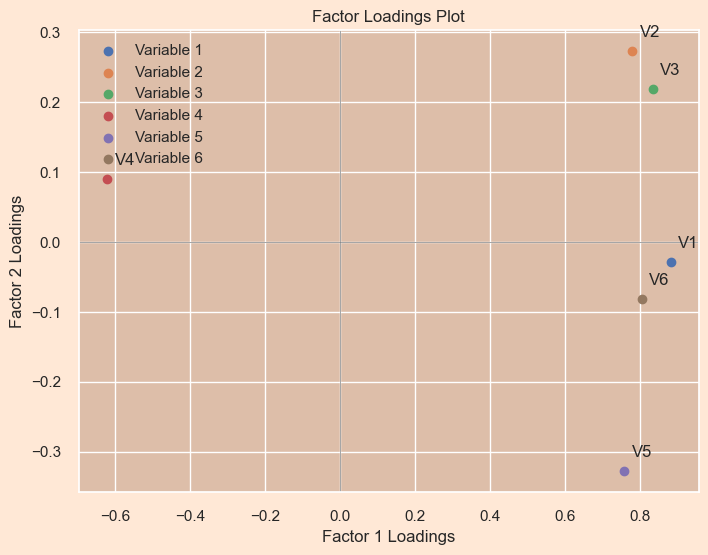

In [236]:
# Get the number of factors
n_factors = factor_loadings.shape[1]

# Create a scatter plot for the factor loadings
plt.figure(figsize=(8, 6))

for i in range(len(factor_loadings)):
    plt.scatter(factor_loadings[i, 0], factor_loadings[i, 1], label=f'Variable {i+1}')
    plt.text(factor_loadings[i, 0] + 0.02, factor_loadings[i, 1] + 0.02, f'V{i+1}', fontsize=12)

plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)

plt.xlabel('Factor 1 Loadings')
plt.ylabel('Factor 2 Loadings')

plt.title('Factor Loadings Plot')
plt.legend()
plt.grid(True)
plt.show()


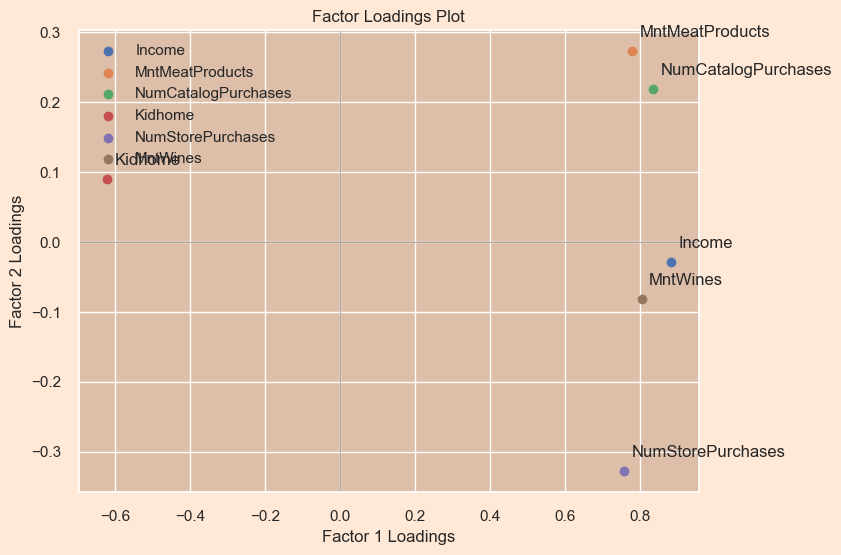

In [237]:
# Assume df_selected has the original data with columns as variable names
variable_names = df_selected.columns

# Create a scatter plot for the factor loadings
plt.figure(figsize=(8, 6))

for i in range(len(factor_loadings)):
    plt.scatter(factor_loadings[i, 0], factor_loadings[i, 1], label=variable_names[i])
    plt.text(factor_loadings[i, 0] + 0.02, factor_loadings[i, 1] + 0.02, variable_names[i], fontsize=12)

plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)

plt.xlabel('Factor 1 Loadings')
plt.ylabel('Factor 2 Loadings')

plt.title('Factor Loadings Plot')
plt.legend()
plt.grid(True)
plt.show()


In [238]:
# Create an instance of FactorAnalyzer with 2 factors and oblimin rotation
efa_oblimin = FactorAnalyzer(n_factors=2, rotation="oblimin")

# Fit the EFA model with oblimin rotation to the data
efa_oblimin.fit(df_selected)

# Get the factor loadings with oblimin rotation
factor_loadings_oblimin = efa_oblimin.loadings_

# Create a DataFrame with the variable names and factor loadings
factor_loadings_df = pd.DataFrame(factor_loadings_oblimin, index=df_selected.columns, columns=["Factor 1", "Factor 2"])

# Print the DataFrame with factor loadings
print("Factor Loadings with Oblimin Rotation:")
print(factor_loadings_df)


Factor Loadings with Oblimin Rotation:
                     Factor 1  Factor 2
Income               0.469243  0.464951
MntMeatProducts      0.864992 -0.049317
NumCatalogPurchases  0.814550  0.060915
Kidhome             -0.223468 -0.437216
NumStorePurchases   -0.056431  0.870528
MntWines             0.343527  0.510804


In [239]:
# Create an instance of FactorAnalyzer with 2 factors and oblimin rotation
efa_oblimin = FactorAnalyzer(n_factors=2, rotation="varimax")

# Fit the EFA model with oblimin rotation to the data
efa_oblimin.fit(df_selected)

# Get the factor loadings with oblimin rotation
factor_loadings_oblimin = efa_oblimin.loadings_

# Create a DataFrame with the variable names and factor loadings
factor_loadings_df = pd.DataFrame(factor_loadings_oblimin, index=df_selected.columns, columns=["Factor 1", "Factor 2"])

# Print the DataFrame with factor loadings
print("Factor Loadings with varimax Rotation:")
print(factor_loadings_df)


Factor Loadings with varimax Rotation:
                     Factor 1  Factor 2
Income               0.609520  0.638959
MntMeatProducts      0.747524  0.353136
NumCatalogPurchases  0.748473  0.430223
Kidhome             -0.379802 -0.500635
NumStorePurchases    0.311068  0.766105
MntWines             0.516927  0.622834


3 factors

In [240]:
# Create an instance of FactorAnalyzer with 2 factors
efa = FactorAnalyzer(n_factors=3, rotation=None)

# Fit the EFA model to the data
efa.fit(df_selected)

# Get the factor loadings
factor_loadings = efa.loadings_

# Print the factor loadings
print("Factor Loadings:")
print(factor_loadings)

# Add the variable name
factor_loadings_df = pd.DataFrame(factor_loadings, index=df_selected.columns, columns=["Factor 1", "Factor 2", "Factor 3"])
print("Factor Loadings with Variable Names:")
print(factor_loadings_df)

Factor Loadings:
[[ 0.91911977 -0.16357244  0.30282062]
 [ 0.75815284  0.14594587  0.09400045]
 [ 0.87118621  0.40839653 -0.08686761]
 [-0.61728727  0.061027    0.12470819]
 [ 0.75462769 -0.29457685 -0.20299378]
 [ 0.79528571 -0.07057714 -0.05501388]]
Factor Loadings with Variable Names:
                     Factor 1  Factor 2  Factor 3
Income               0.919120 -0.163572  0.302821
MntMeatProducts      0.758153  0.145946  0.094000
NumCatalogPurchases  0.871186  0.408397 -0.086868
Kidhome             -0.617287  0.061027  0.124708
NumStorePurchases    0.754628 -0.294577 -0.202994
MntWines             0.795286 -0.070577 -0.055014


In [241]:
# Create an instance of FactorAnalyzer with 3 factors and oblimin rotation
efa_oblimin = FactorAnalyzer(n_factors=3, rotation="oblimin")

# Fit the EFA model with oblimin rotation to the data
efa_oblimin.fit(df_selected)

# Get the factor loadings with oblimin rotation
factor_loadings_oblimin = efa_oblimin.loadings_

# Create a DataFrame with the variable names and factor loadings
factor_loadings_df = pd.DataFrame(factor_loadings_oblimin, index=df_selected.columns, columns=["Factor 1", "Factor 2", "Factor 3"])

# Print the DataFrame with factor loadings
print("Factor Loadings with Oblimin Rotation:")
print(factor_loadings_df)


Factor Loadings with Oblimin Rotation:
                     Factor 1  Factor 2  Factor 3
Income              -0.007197  0.033670  0.958850
MntMeatProducts      0.458128 -0.017420  0.390063
NumCatalogPurchases  0.951069  0.032045 -0.009989
Kidhome             -0.208050 -0.459967 -0.011875
NumStorePurchases   -0.033319  0.852915  0.006066
MntWines             0.232972  0.428431  0.209564


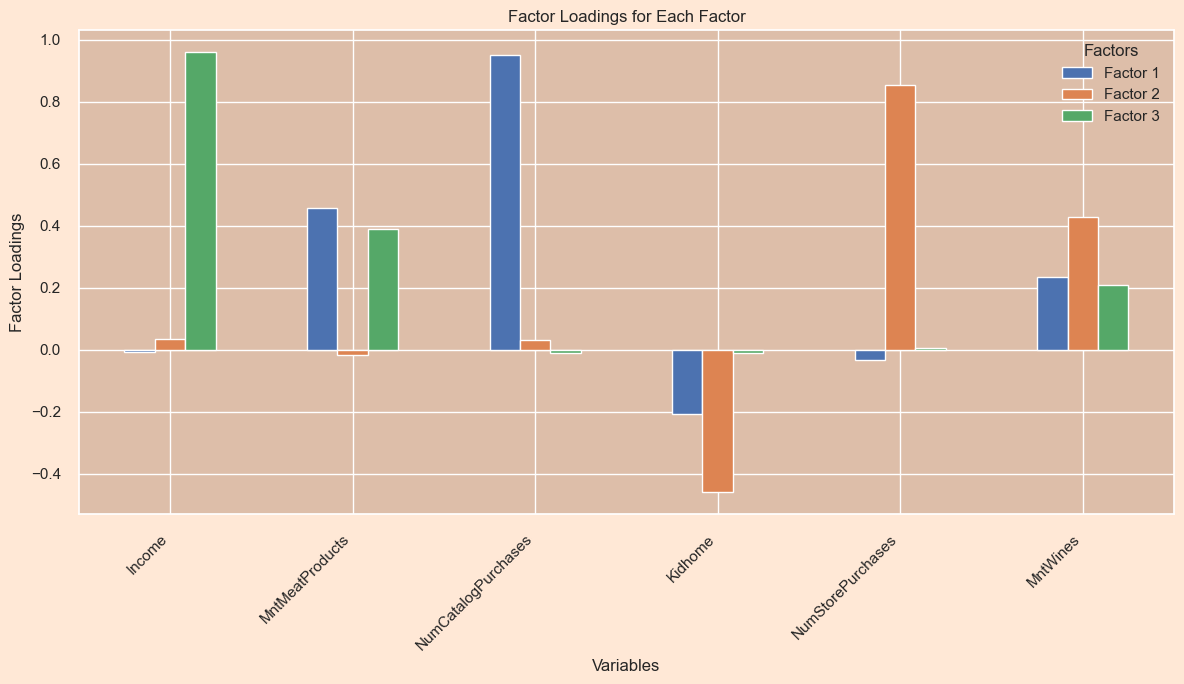

In [242]:
import matplotlib.pyplot as plt

factor_loadings_df.plot(kind='bar', figsize=(12, 7))
plt.xlabel('Variables')
plt.ylabel('Factor Loadings')
plt.title('Factor Loadings for Each Factor')
plt.legend(title='Factors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [243]:
# Create an instance of FactorAnalyzer with 2 factors and oblimin rotation
efa_oblimin = FactorAnalyzer(n_factors=2, rotation="varimax")

# Fit the EFA model with oblimin rotation to the data
efa_oblimin.fit(df_selected)

# Get the factor loadings with oblimin rotation
factor_loadings_oblimin = efa_oblimin.loadings_

# Create a DataFrame with the variable names and factor loadings
factor_loadings_df = pd.DataFrame(factor_loadings_oblimin, index=df_selected.columns, columns=["Factor 1", "Factor 2"])

# Print the DataFrame with factor loadings
print("Factor Loadings with varimax Rotation:")
print(factor_loadings_df)


Factor Loadings with varimax Rotation:
                     Factor 1  Factor 2
Income               0.609520  0.638959
MntMeatProducts      0.747524  0.353136
NumCatalogPurchases  0.748473  0.430223
Kidhome             -0.379802 -0.500635
NumStorePurchases    0.311068  0.766105
MntWines             0.516927  0.622834


<a id="5"></a>
# <p style="background-color:#B7B7A4;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:5px 5px;">Dimensionality Reduction</p>


In [244]:
df_selected

Income  MntMeatProducts  NumCatalogPurchases   Kidhome  \
0     0.282419         1.719976             2.601874 -0.815224   
1    -0.297402        -0.744646            -0.604504  1.044804   
2     0.944882        -0.192388            -0.248240 -0.815224   
3    -1.265802        -0.680748            -0.960768  1.044804   
4     0.290039        -0.233465             0.108024  1.044804   
...        ...              ...                  ...       ...   
2142  0.434085         0.058638             0.108024 -0.815224   
2143  0.571297        -0.635107            -0.248240  2.904833   
2144  0.225538         0.218382             0.108024 -0.815224   
2145  0.828465         0.204690             0.820553 -0.815224   
2146  0.023383        -0.493620            -0.604504  1.044804   

      NumStorePurchases  MntWines  
0             -0.584555  0.949407  
1             -1.200677 -0.894000  
2              1.263810  0.331984  
3             -0.584555 -0.894000  
4              0.031567 -0.415423  
...                 ...       ...  
2142          -0.584555  1.168016  
2143          -0.276494  0.272900  
2144           2.187993  1.755898  
2145           1.263810  0.337892  
2146          -0.584555 -0.678345  

[2147 rows x 6 columns]

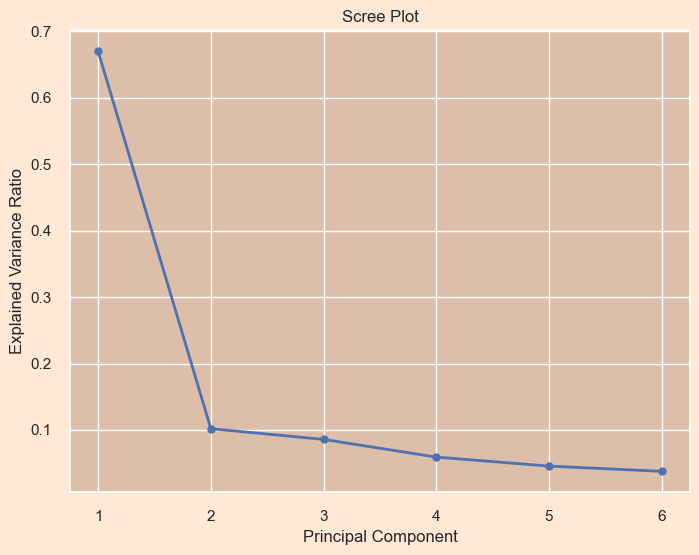

In [245]:
# Fit PCA
pca = PCA()
pca.fit(df_selected)

# Calculate the explained variance for each component
explained_variance = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

In [246]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(df_selected)
PCA_ds = pd.DataFrame(pca.transform(df_selected), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2147.0 -5.626095e-17  2.005511 -3.309709 -1.928898 -0.352810  1.741488   
col2  2147.0 -2.151154e-17  0.781931 -1.385947 -0.786159  0.249347  0.448329   
col3  2147.0  4.964202e-18  0.717443 -6.417665 -0.425599  0.029465  0.362071   

           max  
col1  5.187647  
col2  6.793167  
col3  2.757963

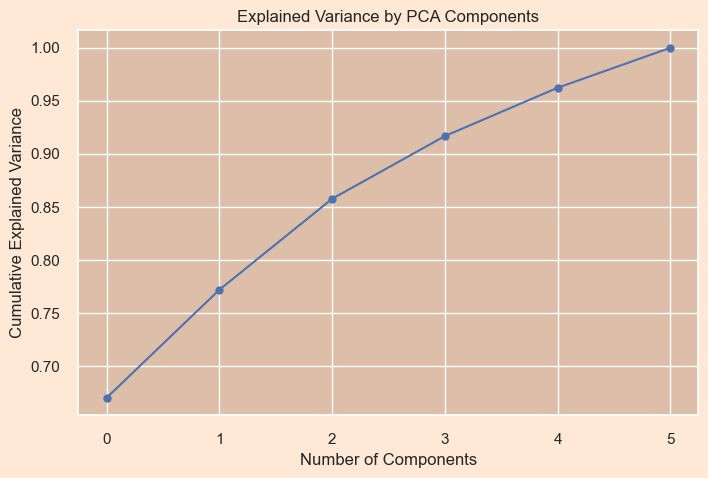

In [247]:
# Perform PCA
pca = PCA()
pca.fit(df_selected)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

In [248]:
import umap

# Initiating UMAP to reduce dimensions to 3
umap_reducer = umap.UMAP(n_components=3)
umap_reducer.fit(df_selected)
UMAP_ds = pd.DataFrame(umap_reducer.transform(df_selected), columns=(["col1","col2", "col3"]))
UMAP_ds.describe().T

count      mean       std       min       25%        50%        75%  \
col1  2147.0  6.927027  7.817606 -5.323480 -1.887713  12.107501  13.818831   
col2  2147.0  5.102643  3.554134 -1.005473  2.264641   4.491597   7.959949   
col3  2147.0  2.381570  2.407359 -5.033230  1.759168   2.435272   3.336354   

            max  
col1  15.749478  
col2  13.435736  
col3  12.858343

In [249]:
from sklearn.manifold import TSNE

# Initiating t-SNE to reduce dimensions to 3
tsne_reducer = TSNE(n_components=3)
TSNE_ds = pd.DataFrame(tsne_reducer.fit_transform(df_selected), columns=(["col1","col2", "col3"]))
TSNE_ds.describe().T

count      mean       std        min       25%       50%       75%  \
col1  2147.0 -0.067795  8.551910 -17.306297 -7.693796  0.770622  7.097441   
col2  2147.0 -0.165805  7.605083 -15.888185 -5.885706  0.237232  5.658987   
col3  2147.0  0.067729  5.643689 -11.084615 -4.074497  0.101486  4.327579   

            max  
col1  16.488495  
col2  15.448587  
col3  15.828415

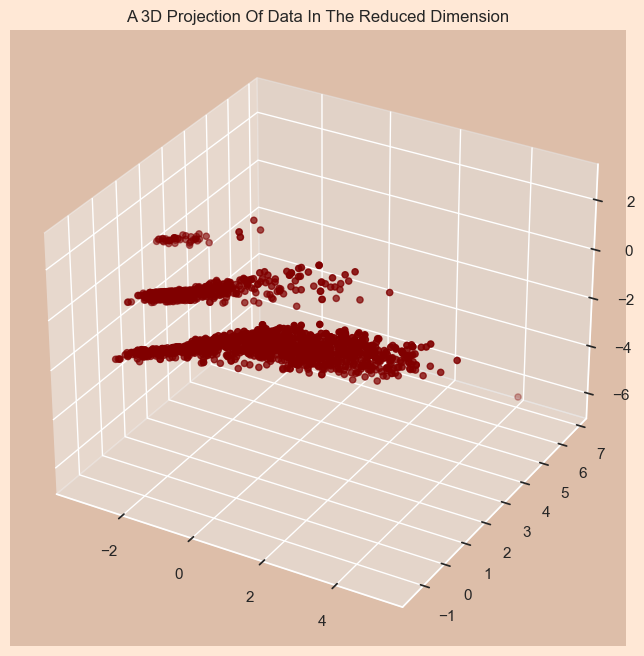

In [250]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

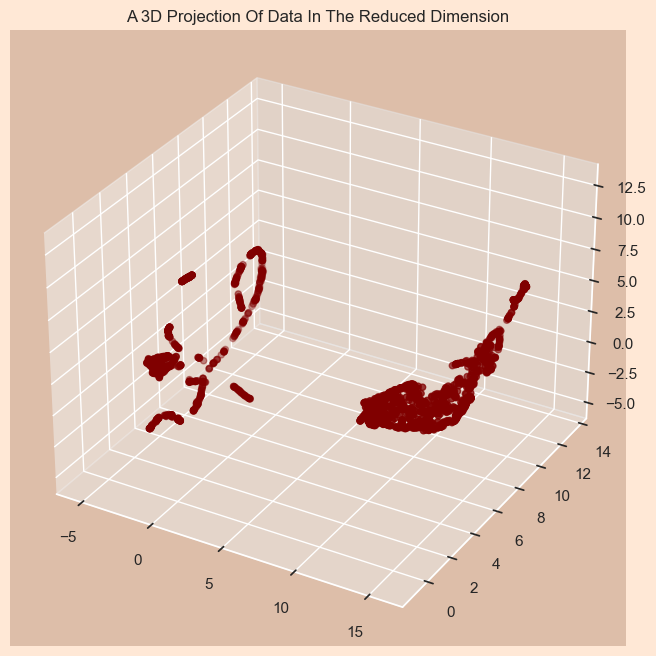

In [251]:
#A 3D Projection Of Data In The Reduced Dimension
x =UMAP_ds["col1"]
y =UMAP_ds["col2"]
z =UMAP_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

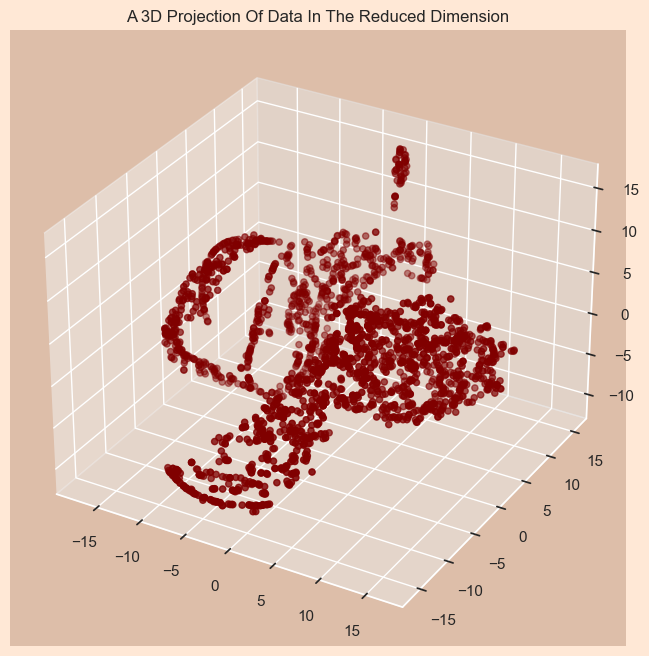

In [252]:
#A 3D Projection Of Data In The Reduced Dimension
x =TSNE_ds["col1"]
y =TSNE_ds["col2"]
z =TSNE_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()


<a id="6"></a>
# <p style="background-color:#B7B7A4;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:5px 5px;">Segmentation</p>


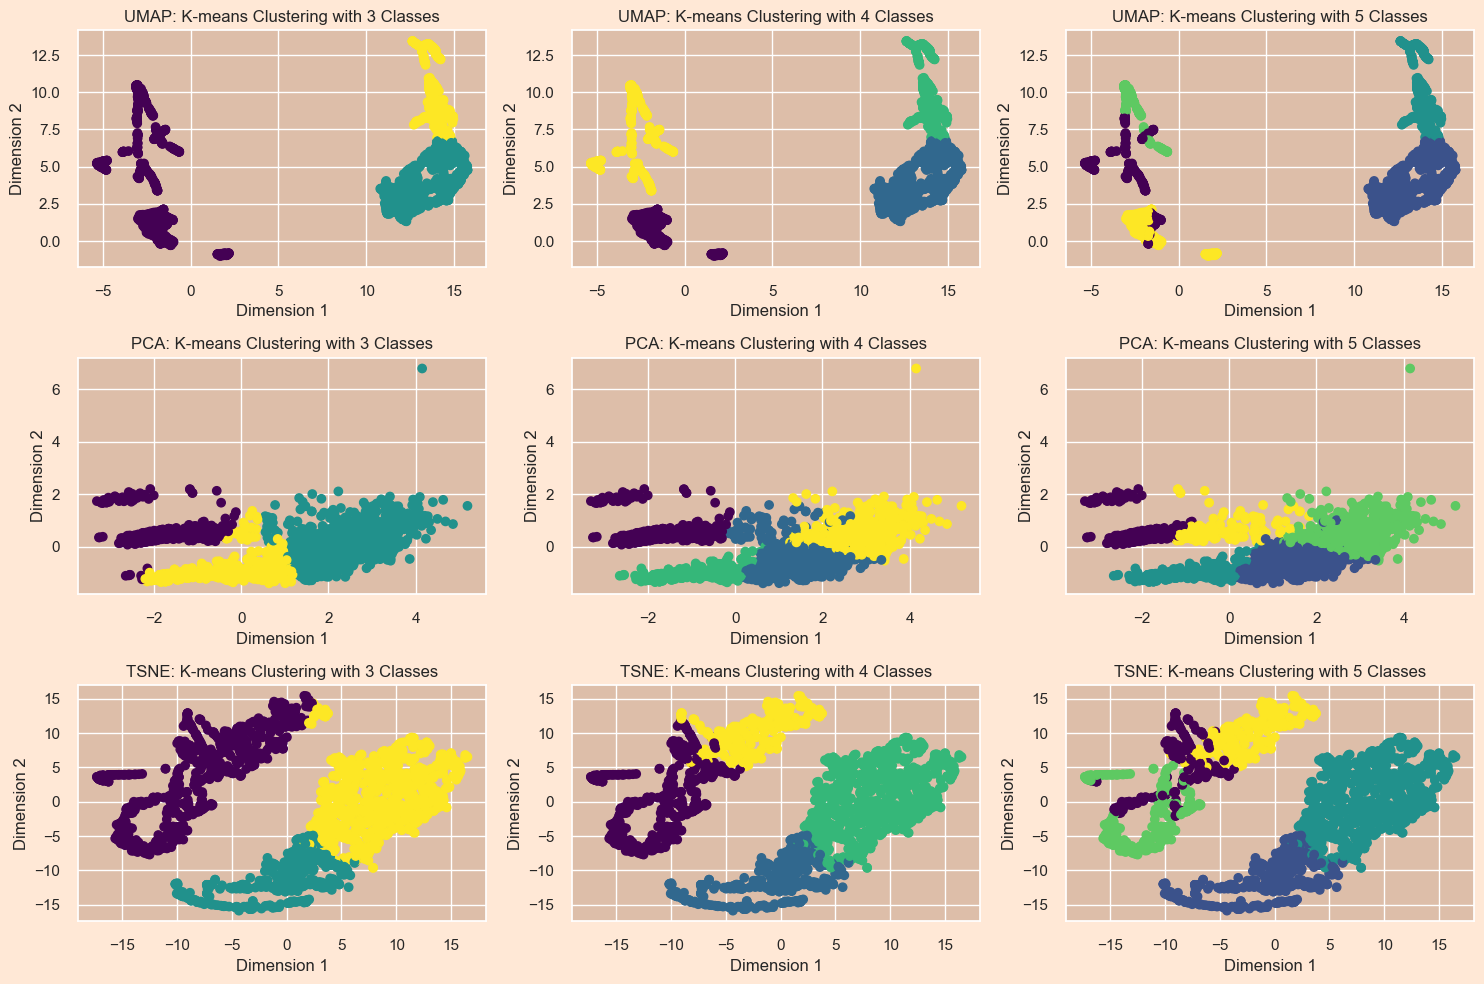

In [253]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the range of number of classes
num_classes = range(3, 6)

# Define the dataframes for dimensionality reduction
dataframes = [UMAP_ds, PCA_ds, TSNE_ds]  # Add corresponding dataframes
df_names = ['UMAP', 'PCA', "TSNE"]  # Add corresponding names

# Plot each iteration of number of classes in a row
fig, axes = plt.subplots(len(dataframes), len(num_classes), figsize=(15, 10))

for i, df in enumerate(dataframes):
    for j, n in enumerate(num_classes):
        # Perform K-means clustering
        kmeans = KMeans(n_clusters=n, random_state=0)
        labels = kmeans.fit_predict(df)

        # Plot the clusters
        axes[i, j].scatter(df['col1'], df['col2'], c=labels, cmap='viridis')
        axes[i, j].set_title(f'{df_names[i]}: K-means Clustering with {n} Classes')
        axes[i, j].set_xlabel('Dimension 1')
        axes[i, j].set_ylabel('Dimension 2')

plt.tight_layout()
plt.show()


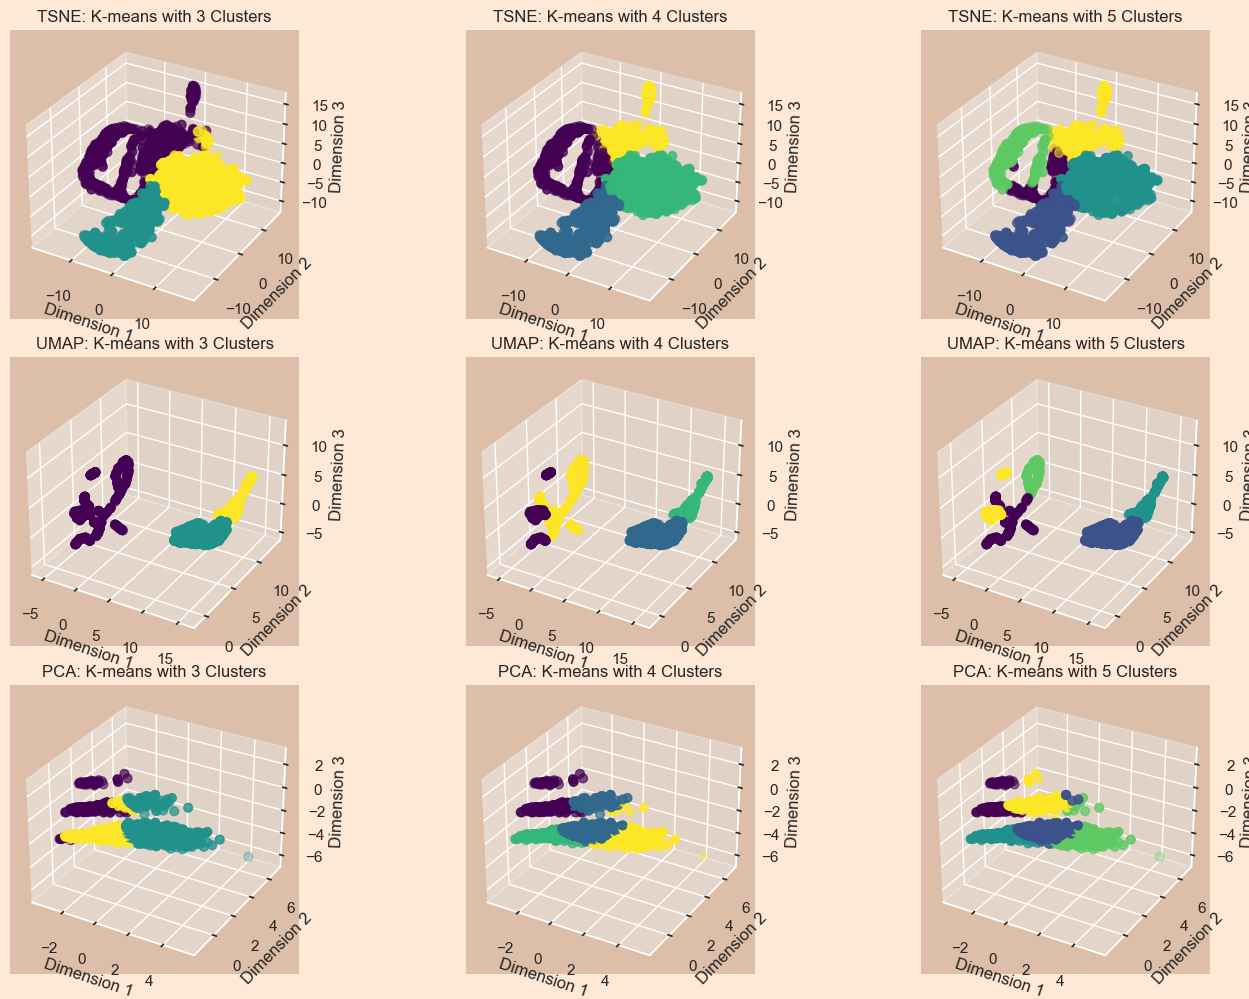

In [254]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the range of number of classes
num_classes = range(3, 6)

# Define the dataframes for dimensionality reduction
dataframes = [TSNE_ds, UMAP_ds, PCA_ds]
df_names = ['TSNE', 'UMAP', 'PCA']  # Add corresponding names

# Plot each iteration of number of classes in a row
fig = plt.figure(figsize=(15, 10))

# Loop through the dataframes and the number of clusters
for i, df in enumerate(dataframes):
    for j, n in enumerate(num_classes):
        # Perform K-means clustering
        kmeans = KMeans(n_clusters=n, random_state=0)
        labels = kmeans.fit_predict(df)

        # Create a 3D subplot
        ax = fig.add_subplot(len(dataframes), len(num_classes), i * len(num_classes) + j + 1, projection='3d')

        # Plot the clusters in 3D
        ax.scatter(df['col1'], df['col2'], df['col3'], c=labels, cmap='viridis', s=40)

        ax.set_title(f'{df_names[i]}: K-means with {n} Clusters')
        ax.set_xlabel('Dimension 1')
        ax.set_ylabel('Dimension 2')
        ax.set_zlabel('Dimension 3')

plt.tight_layout()
plt.show()


silhouette score

For n_clusters = 2, The average silhouette_score is : 0.540
For n_clusters = 3, The average silhouette_score is : 0.451
For n_clusters = 4, The average silhouette_score is : 0.471
For n_clusters = 5, The average silhouette_score is : 0.449
For n_clusters = 6, The average silhouette_score is : 0.420


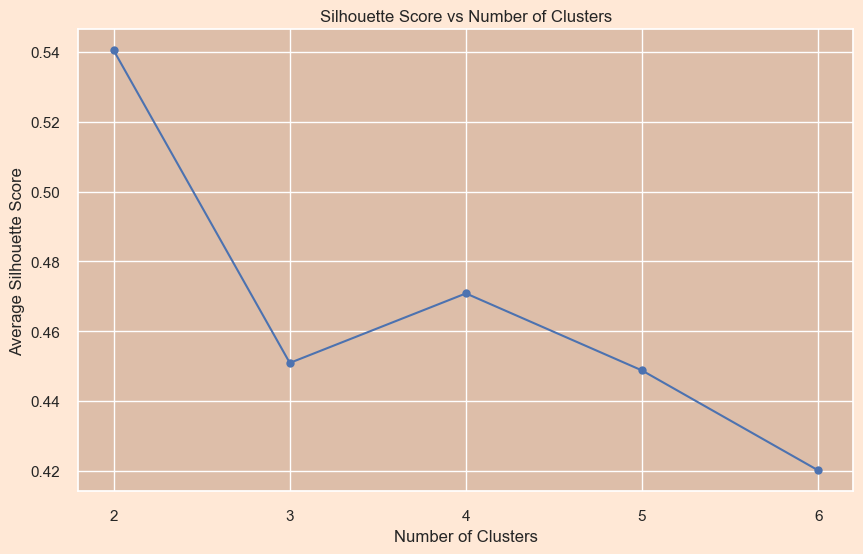

In [255]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming PCA_ds is already loaded and ready for clustering

range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avgs = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(PCA_ds)

    silhouette_avg = silhouette_score(PCA_ds, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg:.3f}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avgs, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Silhouette Score")
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()


For n_clusters = 2, The average silhouette_score is : 0.540


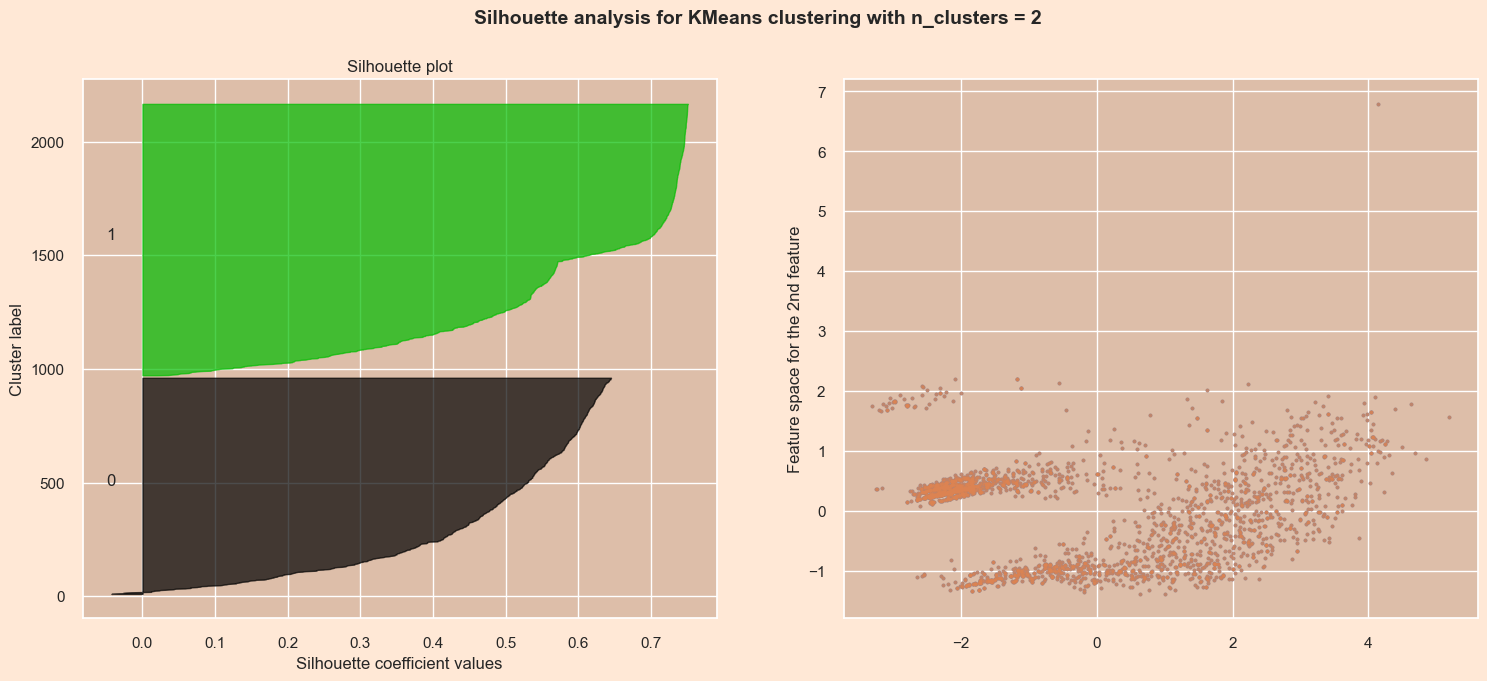

For n_clusters = 3, The average silhouette_score is : 0.451


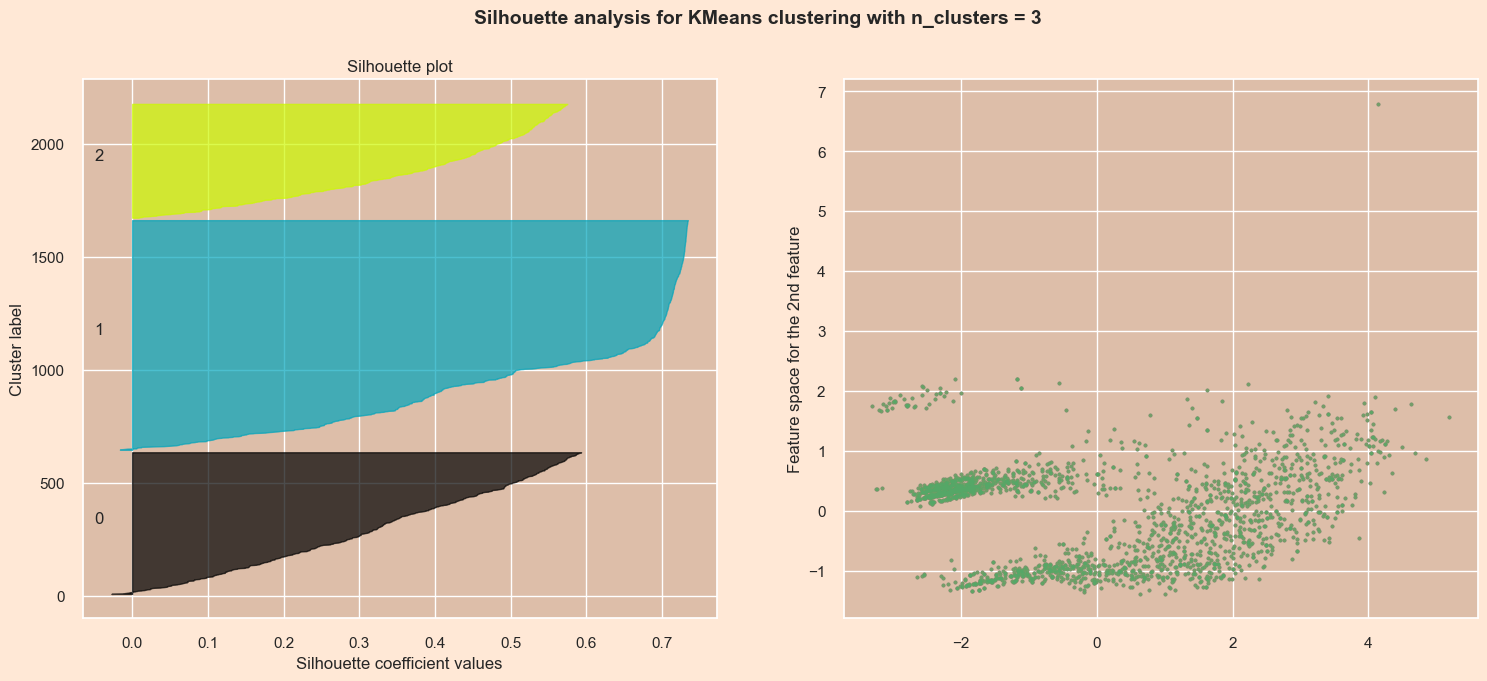

For n_clusters = 4, The average silhouette_score is : 0.471


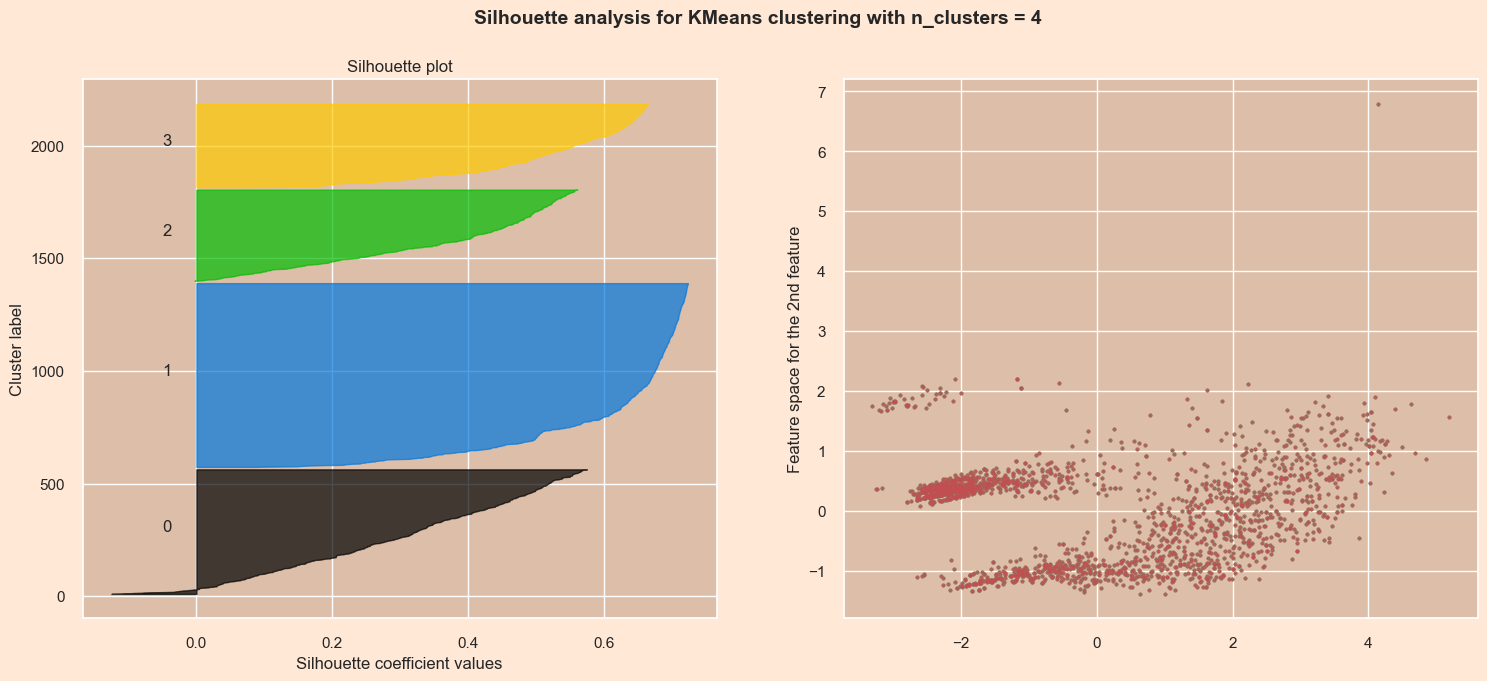

For n_clusters = 5, The average silhouette_score is : 0.449


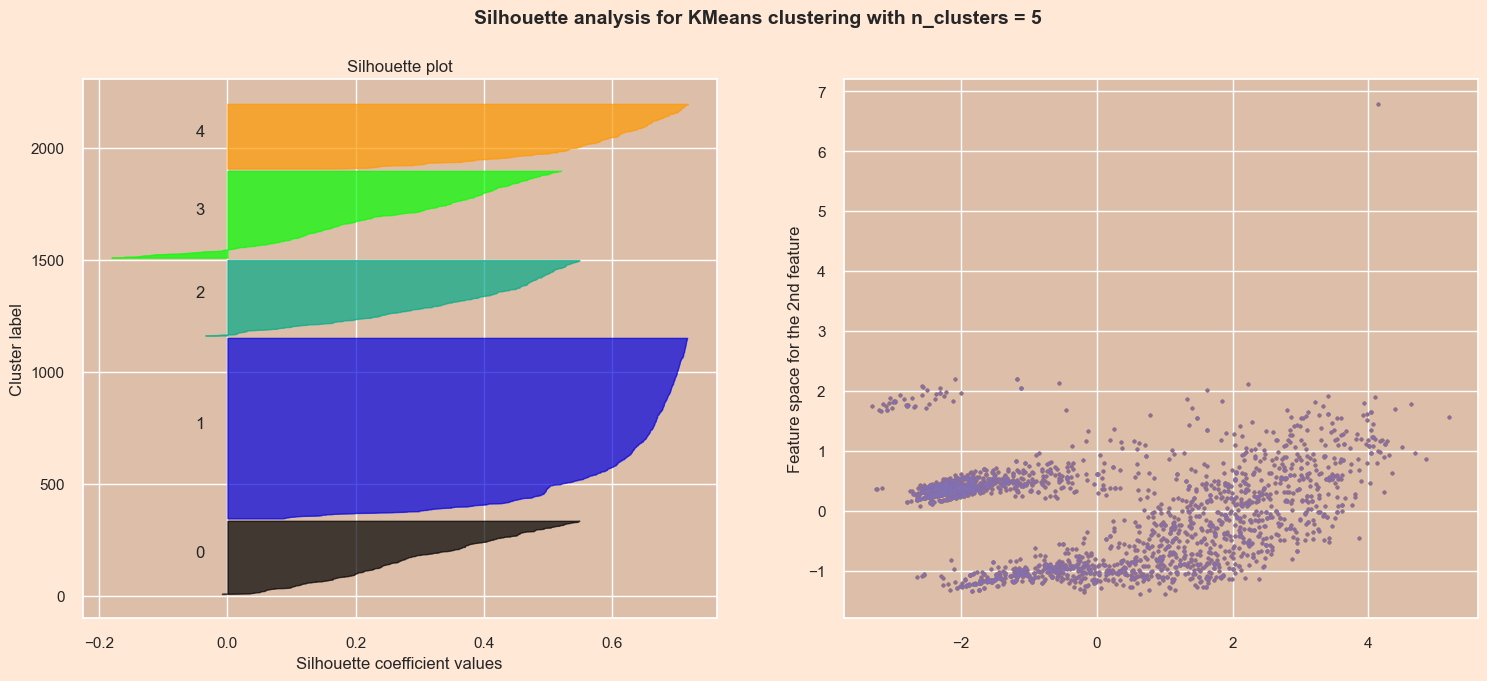

For n_clusters = 6, The average silhouette_score is : 0.420


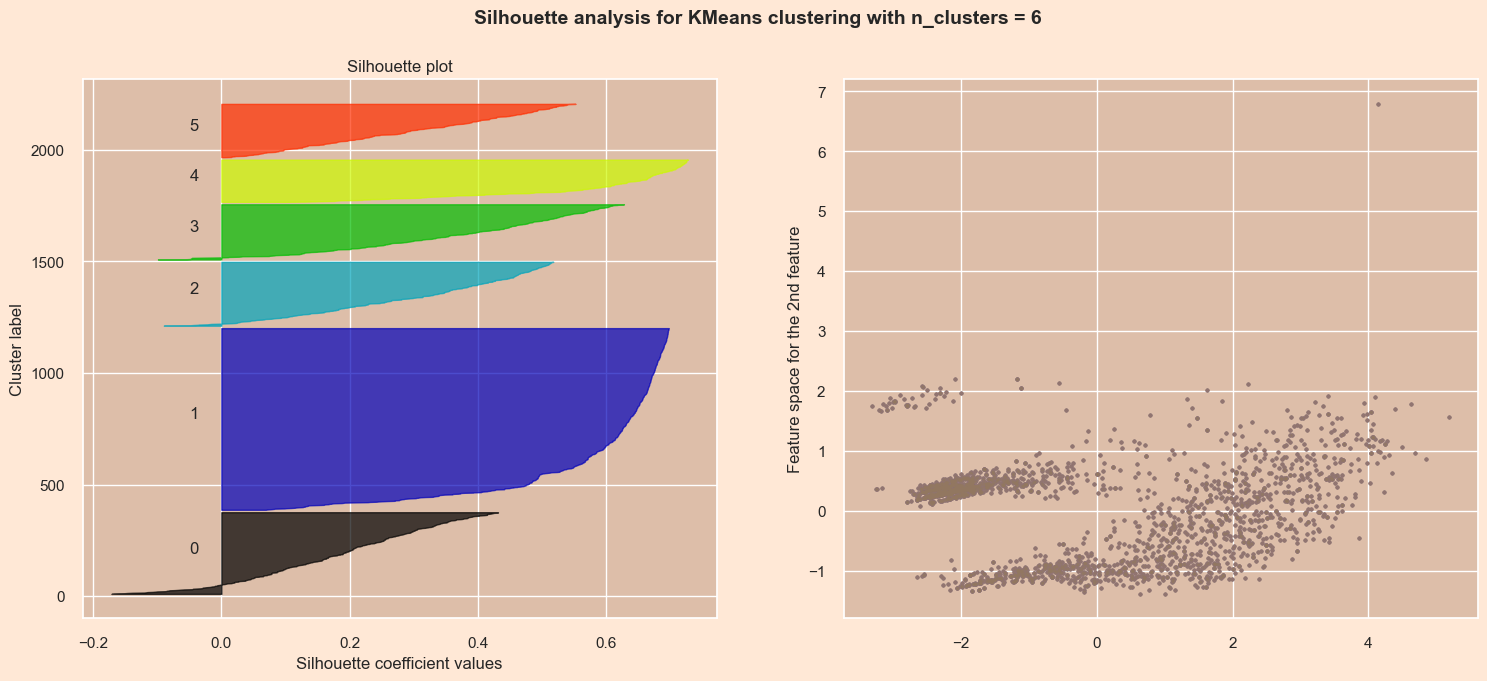

In [256]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Assuming PCA_ds is already loaded and ready for clustering

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(PCA_ds)

    silhouette_avg = silhouette_score(PCA_ds, cluster_labels)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg:.3f}")

    sample_silhouette_values = silhouette_samples(PCA_ds, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

        ax1.set_title("Silhouette plot")
        ax1.set_xlabel("Silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax2.set_ylabel("Feature space for the 2nd feature")  # Move this line above the scatter plot
        ax2.scatter(PCA_ds.to_numpy()[:, 0], PCA_ds.to_numpy()[:, 1], marker=".", s=30, lw=0, alpha=0.7)

        plt.suptitle(f"Silhouette analysis for KMeans clustering with n_clusters = {n_clusters}",
                     fontsize=14, fontweight="bold")

    plt.show()


# creiamo copia df select

In [257]:
df_selected_copy = df_selected.copy()
df_selected_copy2 = df_selected.copy()

# K-MEANS TSNE 4 CLUSTERS

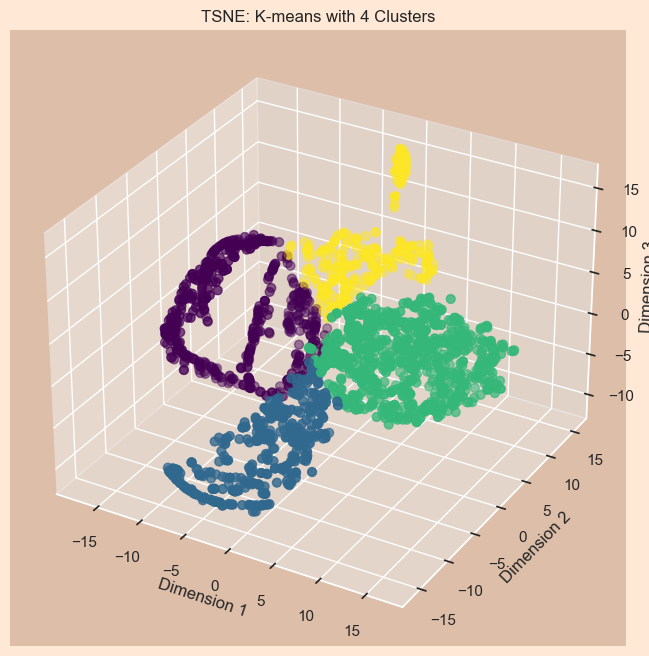

In [258]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming TSNE_ds is the dataframe for TSNE results
# We are focusing on 4 clusters for TSNE

# Number of clusters
n_clusters = 4

# Perform K-means clustering on the TSNE data
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
labels = kmeans.fit_predict(TSNE_ds)

# Adding the Clusters feature to the  dataframe
df_feature_selected_non_scaled["TSNE_Clusters KMeans"] = labels

# Plotting the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(TSNE_ds['col1'], TSNE_ds['col2'], TSNE_ds['col3'], c=labels, cmap='viridis', s=40)

# Set title and labels
ax.set_title(f'TSNE: K-means with {n_clusters} Clusters')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

# Show the plot
plt.show()


# K-MEANS PCA 4 CLUSTERS

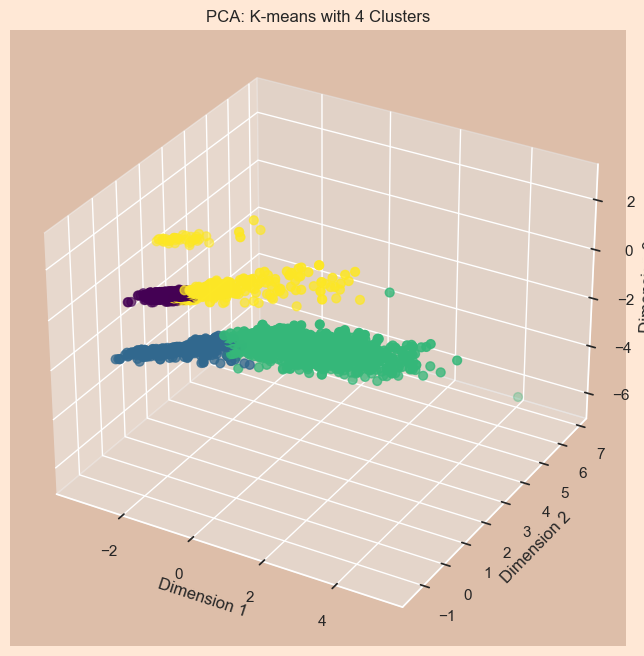

In [259]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Number of clusters
n_clusters = 4

# Perform K-means clustering on the TSNE data
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
pca_labels = kmeans.fit_predict(PCA_ds)


# Adding the Clusters feature to the data_copy dataframe
df_feature_selected_non_scaled["PCA_Clusters KMeans"] = pca_labels

# Plotting the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(PCA_ds['col1'], PCA_ds['col2'], PCA_ds['col3'], c=labels, cmap='viridis', s=40)

# Set title and labels
ax.set_title(f'PCA: K-means with {n_clusters} Clusters')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

# Show the plot
plt.show()


# UMAP 4 CLUSTERS K-MEANS

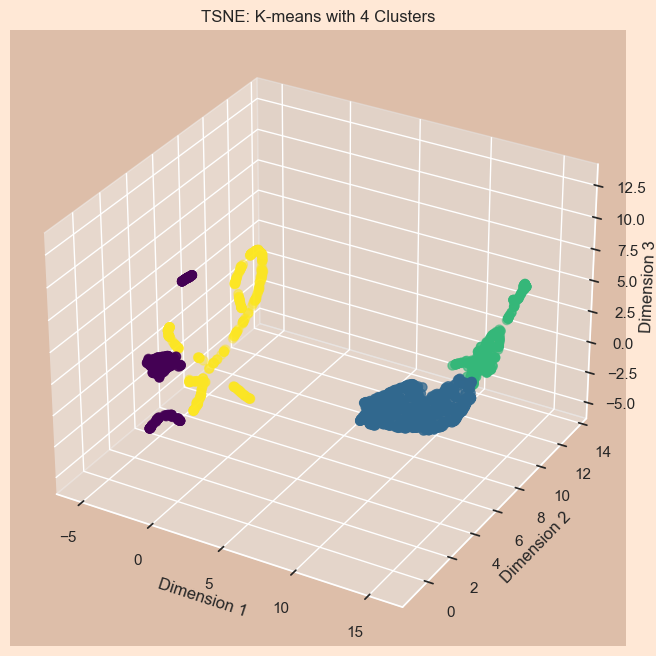

In [260]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming TSNE_ds is the dataframe for TSNE results
# We are focusing on 4 clusters for TSNE

# Number of clusters
n_clusters = 4

# Perform K-means clustering on the TSNE data
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
labels = kmeans.fit_predict(UMAP_ds)

# Adding the Clusters feature to the  dataframe
df_feature_selected_non_scaled["UMAP_Clusters KMeans"] = labels

# Plotting the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(UMAP_ds['col1'], UMAP_ds['col2'], UMAP_ds['col3'], c=labels, cmap='viridis', s=40)

# Set title and labels
ax.set_title(f'TSNE: K-means with {n_clusters} Clusters')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

# Show the plot
plt.show()


# BIPLOT PCA CON CLUSTER

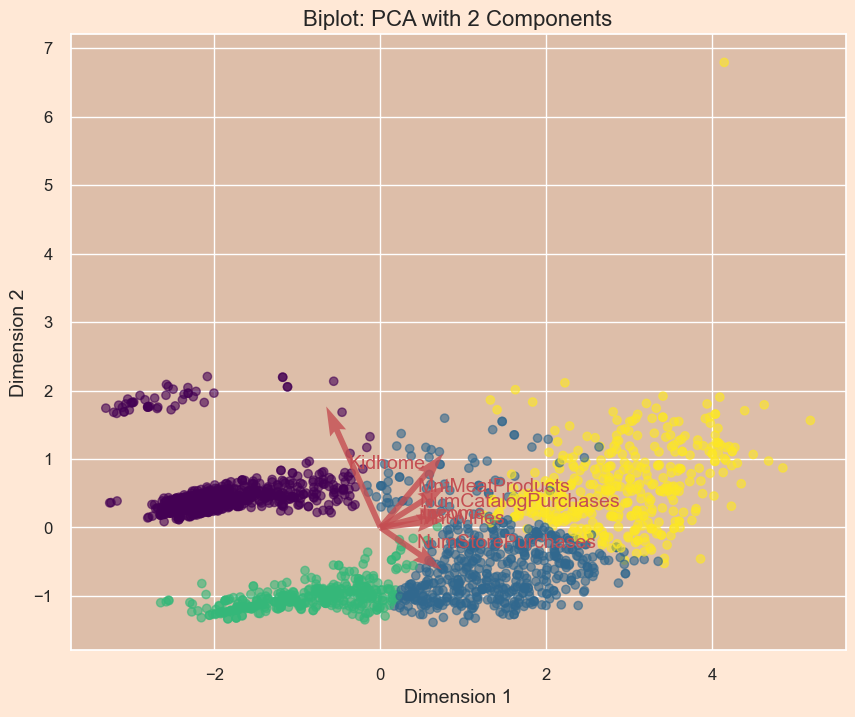

In [261]:
# Fit PCA
pca = PCA(n_components=2)
pca.fit(df_selected)

# Create a biplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

# Plot the data points
ax.scatter(PCA_ds['col1'], PCA_ds['col2'], c=pca_labels, cmap='viridis', alpha=0.6)

# Plot the feature vectors
feature_vectors = pca.components_.T
for i, v in enumerate(feature_vectors):
    ax.quiver(0, 0, v[0], v[1], color='r', alpha=0.8, scale=5)
    ax.text(v[0]*1.1, v[1]*1.1, df_selected.columns[i], fontsize=14, color='r')

# Set labels and title
ax.set_xlabel('Dimension 1', fontsize=14)
ax.set_ylabel('Dimension 2', fontsize=14)
ax.set_title('Biplot: PCA with 2 Components', fontsize=16)

# Increase font size of tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Show the plot
plt.show()


# CLUSTER QTY VIZ

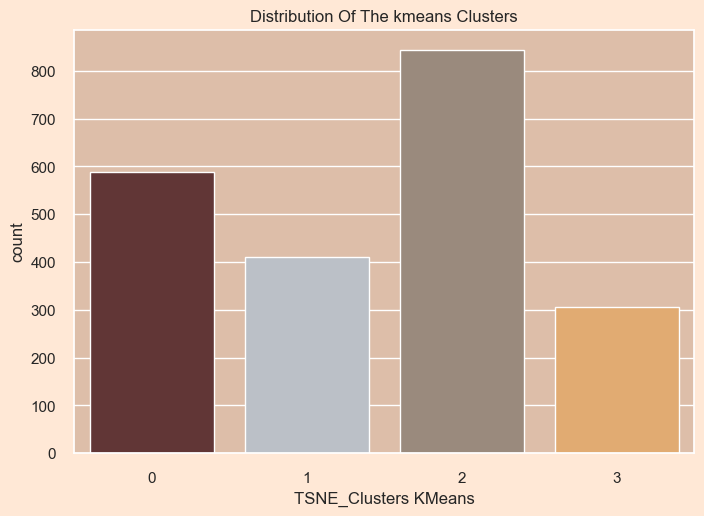

In [262]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df_feature_selected_non_scaled["TSNE_Clusters KMeans"], palette= pal)
pl.set_title("Distribution Of The kmeans Clusters")
plt.show()

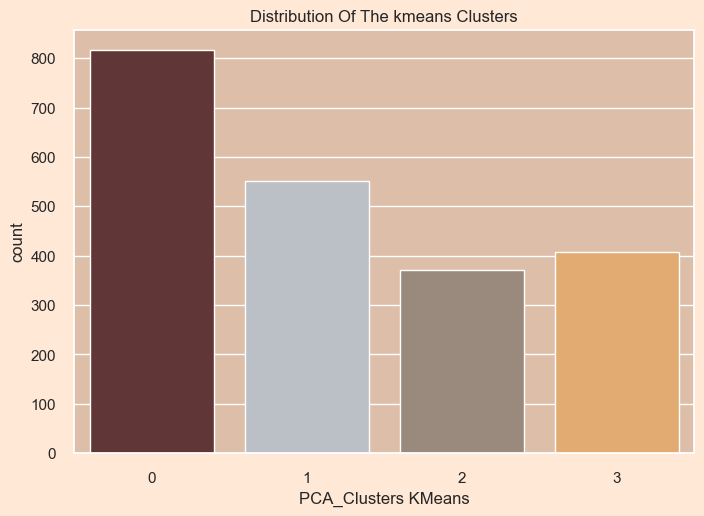

In [263]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df_feature_selected_non_scaled["PCA_Clusters KMeans"], palette= pal)
pl.set_title("Distribution Of The kmeans Clusters")
plt.show()

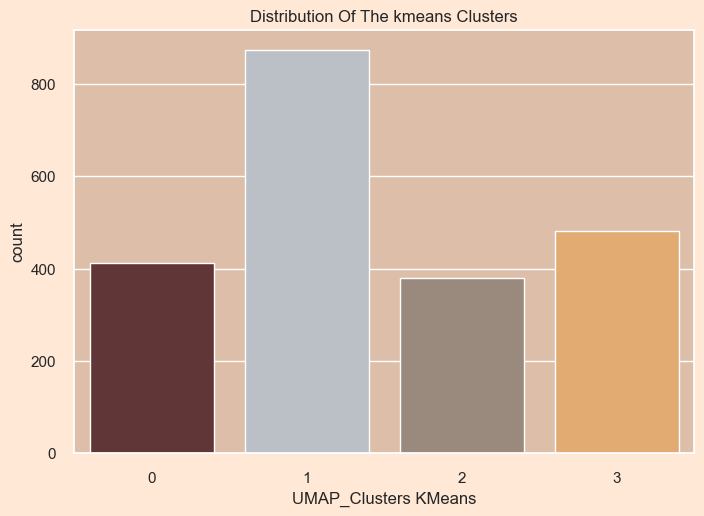

In [264]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df_feature_selected_non_scaled["UMAP_Clusters KMeans"], palette= pal)
pl.set_title("Distribution Of The kmeans Clusters")
plt.show()

<a id="7"></a>
# <p style="background-color:#B7B7A4;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:5px 5px;">Evaluating Models</p>


In [265]:
df_feature_selected_non_scaled.head()

Income  MntMeatProducts  NumCatalogPurchases  Kidhome  NumStorePurchases  \
0  58138.0              546                   10        0                  4   
1  46344.0                6                    1        1                  2   
2  71613.0              127                    2        0                 10   
3  26646.0               20                    0        1                  4   
4  58293.0              118                    3        1                  6   

   MntWines  TSNE_Clusters KMeans  PCA_Clusters KMeans  UMAP_Clusters KMeans  
0       635                     2                    3                     1  
1        11                     3                    0                     0  
2       426                     2                    1                     1  
3        11                     0                    0                     3  
4       173                     3                    0                     0

In [266]:
df_feature_selected_non_scaled.dtypes

Income                  float64
MntMeatProducts           int64
NumCatalogPurchases       int64
Kidhome                   int64
NumStorePurchases         int64
MntWines                  int64
TSNE_Clusters KMeans      int32
PCA_Clusters KMeans       int32
UMAP_Clusters KMeans      int32
dtype: object

In [267]:
# cretae a df with only numerical columns and PCA_Clusters AC
data_num_pca = df_feature_selected_non_scaled[['MntMeatProducts', 'NumCatalogPurchases', 'NumStorePurchases', 'Kidhome', 'MntWines', 'Income', 'PCA_Clusters KMeans']]
data_num_tsne = df_feature_selected_non_scaled[['MntMeatProducts', 'NumCatalogPurchases', 'NumStorePurchases', 'Kidhome', 'MntWines', 'Income', 'TSNE_Clusters KMeans']]
data_num_umap = df_feature_selected_non_scaled[['MntMeatProducts', 'NumCatalogPurchases', 'NumStorePurchases', 'Kidhome', 'MntWines', 'Income', 'UMAP_Clusters KMeans']]


In [268]:
from tabulate import tabulate
# create a df with each numerical column and the mean value for each cluster
def cluster_mean(df):
    df = df.groupby("PCA_Clusters KMeans").mean().round(0)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return

cluster_mean(data_num_pca)

+-----------------------+-------------------+-----------------------+---------------------+-----------+------------+----------+
|   PCA_Clusters KMeans |   MntMeatProducts |   NumCatalogPurchases |   NumStorePurchases |   Kidhome |   MntWines |   Income |
|-----------------------+-------------------+-----------------------+---------------------+-----------+------------+----------|
|                     0 |                31 |                     1 |                   3 |         1 |         60 |    36210 |
|                     1 |               187 |                     4 |                   9 |         0 |        546 |    65319 |
|                     2 |                43 |                     1 |                   4 |         0 |        120 |    41207 |
|                     3 |               537 |                     7 |                   8 |         0 |        683 |    77546 |
+-----------------------+-------------------+-----------------------+---------------------+-----------+-

In [269]:
from tabulate import tabulate
# create a df with each numerical column and the mean value for each cluster
def cluster_mean(df):
    df = df.groupby("UMAP_Clusters KMeans").mean().round(0)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return

cluster_mean(data_num_umap)

+------------------------+-------------------+-----------------------+---------------------+-----------+------------+----------+
|   UMAP_Clusters KMeans |   MntMeatProducts |   NumCatalogPurchases |   NumStorePurchases |   Kidhome |   MntWines |   Income |
|------------------------+-------------------+-----------------------+---------------------+-----------+------------+----------|
|                      0 |                87 |                     2 |                   5 |         1 |        211 |    48336 |
|                      1 |               348 |                     5 |                   9 |         0 |        605 |    70762 |
|                      2 |                42 |                     1 |                   4 |         0 |        128 |    41721 |
|                      3 |                15 |                     0 |                   3 |         1 |         18 |    30945 |
+------------------------+-------------------+-----------------------+---------------------+-----

In [270]:
from tabulate import tabulate
# create a df with each numerical column and the mean value for each cluster
def cluster_mean(df):
    df = df.groupby("TSNE_Clusters KMeans").mean().round(0)
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return

cluster_mean(data_num_tsne)

+------------------------+-------------------+-----------------------+---------------------+-----------+------------+----------+
|   TSNE_Clusters KMeans |   MntMeatProducts |   NumCatalogPurchases |   NumStorePurchases |   Kidhome |   MntWines |   Income |
|------------------------+-------------------+-----------------------+---------------------+-----------+------------+----------|
|                      0 |                18 |                     0 |                   3 |         1 |         25 |    32056 |
|                      1 |                47 |                     1 |                   5 |         0 |        140 |    43013 |
|                      2 |               357 |                     5 |                   9 |         0 |        618 |    71201 |
|                      3 |               104 |                     2 |                   6 |         1 |        263 |    52165 |
+------------------------+-------------------+-----------------------+---------------------+-----

# viz con PCA

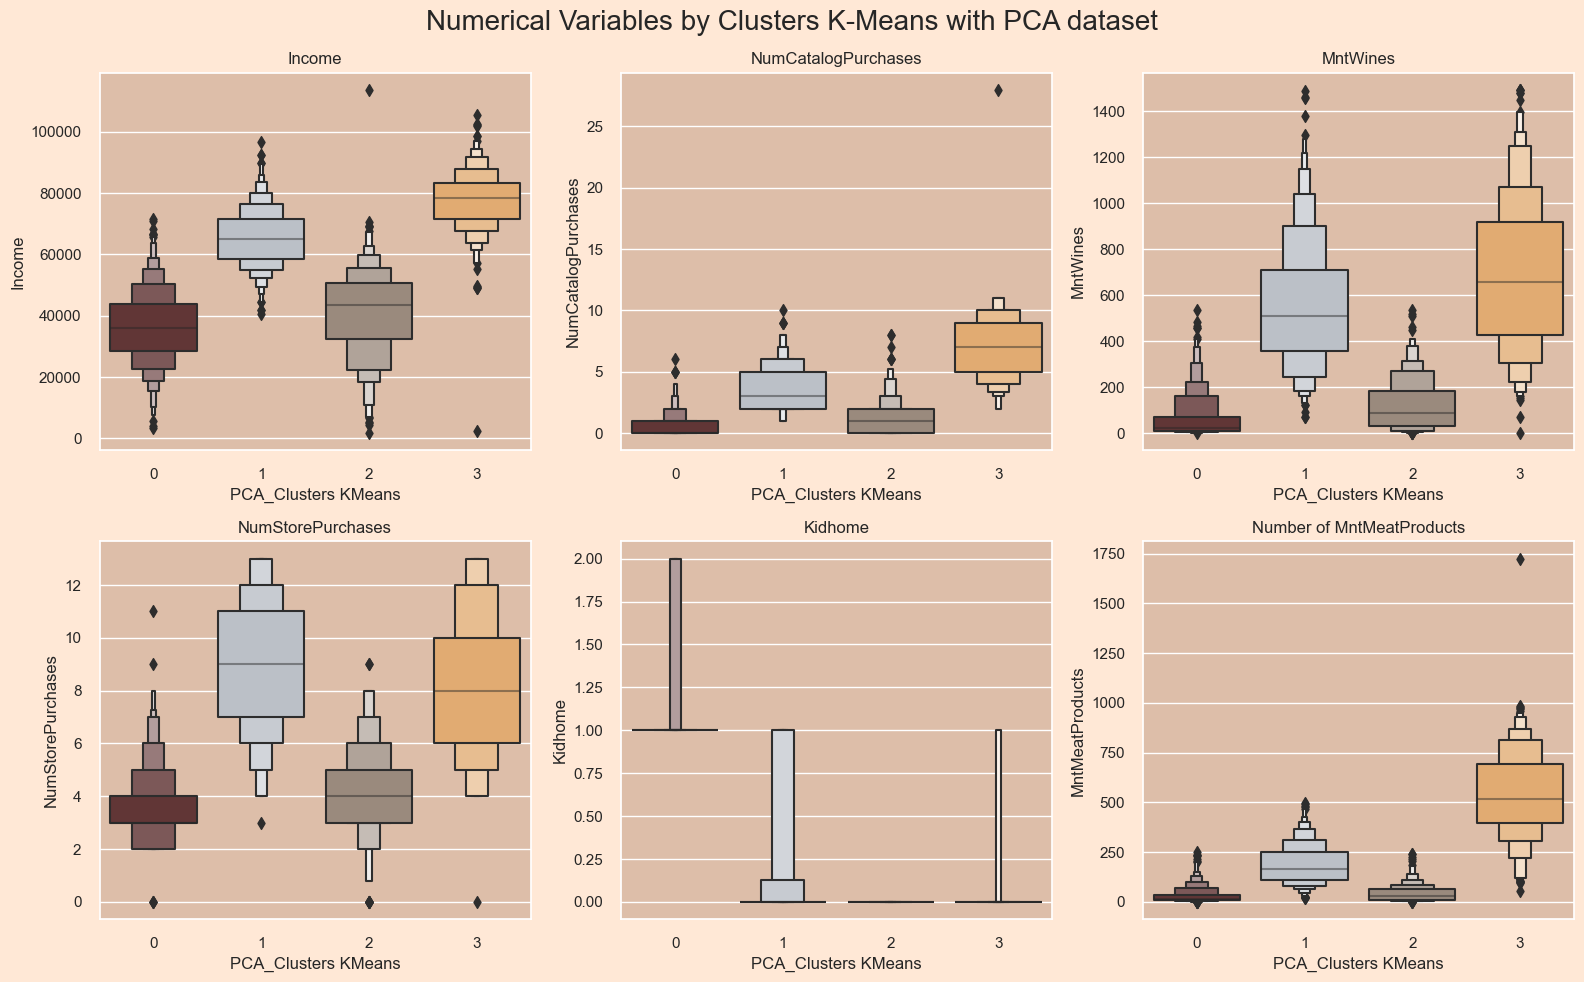

In [273]:
# Create a figure with two subplots arranged in one row and two columns
fig, axes = plt.subplots(2, 3, figsize=(16, 10))  # Adjust the figsize as needed

# Add main title to the figure
fig.suptitle("Numerical Variables by Clusters K-Means with PCA dataset", fontsize=20)

# Plotting the number of deals purchased by order value in the first subplot
sns.boxenplot(y=data_num_pca["Income"], x=data_num_pca["PCA_Clusters KMeans"], palette=pal, ax=axes[0, 0])
axes[0, 0].set_title("Income")
axes[0, 0].set_xlabel("PCA_Clusters KMeans")
axes[0, 0].set_ylabel("Income")

# Plotting the number of deals purchased by customer age in the second subplot
sns.boxenplot(y=data_num_pca["NumCatalogPurchases"], x=data_num_pca["PCA_Clusters KMeans"], palette=pal, ax=axes[0, 1])
axes[0, 1].set_title("NumCatalogPurchases")
axes[0, 1].set_xlabel("PCA_Clusters KMeans")
axes[0, 1].set_ylabel("NumCatalogPurchases")

# Plotting the number of deals purchased by customer age in the second subplot
sns.boxenplot(y=data_num_pca["MntWines"], x=data_num_pca["PCA_Clusters KMeans"], palette=pal, ax=axes[0, 2])
axes[0, 2].set_title("MntWines")
axes[0, 2].set_xlabel("PCA_Clusters KMeans")
axes[0, 2].set_ylabel("MntWines")

# Plotting the number of deals purchased by order value in the first subplot
sns.boxenplot(y=data_num_pca["NumStorePurchases"], x=data_num_pca["PCA_Clusters KMeans"], palette=pal, ax=axes[1, 0])
axes[1, 0].set_title("NumStorePurchases")
axes[1, 0].set_xlabel("PCA_Clusters KMeans")
axes[1, 0].set_ylabel("NumStorePurchases")

# Plotting the number of deals purchased by customer age in the second subplot
sns.boxenplot(y=data_num_pca["Kidhome"], x=data_num_pca["PCA_Clusters KMeans"], palette=pal, ax=axes[1, 1])
axes[1, 1].set_title("Kidhome")
axes[1, 1].set_xlabel("PCA_Clusters KMeans")
axes[1, 1].set_ylabel("Kidhome")

sns.boxenplot(y=data_num_pca["MntMeatProducts"], x=data_num_pca["PCA_Clusters KMeans"], palette=pal, ax=axes[1, 2])
axes[1, 2].set_title("Number of MntMeatProducts")
axes[1, 2].set_xlabel("PCA_Clusters KMeans")
axes[1, 2].set_ylabel("MntMeatProducts")


# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Display the plots
plt.show()

dei 4 cluster il cluster 3 è quello con l'income piu alto, vediamo infatti che è correlato al maggior consumo di carne e vino rispetto algi altri cluster e vediamo come è il piu alto tra i catalog purchases ed il secondo nei store purchases. il clustger 1 è quello che segue di più le orme dei cluster 3, con la grande differenza che vediamo una maggior quantittà di figli nell'household del cluster 1. Il cluster 0 invece è quello con l'income più basso e con il minor numero di acquisti sia nei catalog che nei store, e quello che consuma meno carne e vino, possiamo anche notare che questo abbia come media minima un figlio, spingendosi fino a due. il cluster 2 è quello con il minor numero di figli e con un income medio, con un consumo di carne e vino medio e con un numero di acquisti nei catalog e nei store medio.

# viz con TSNE

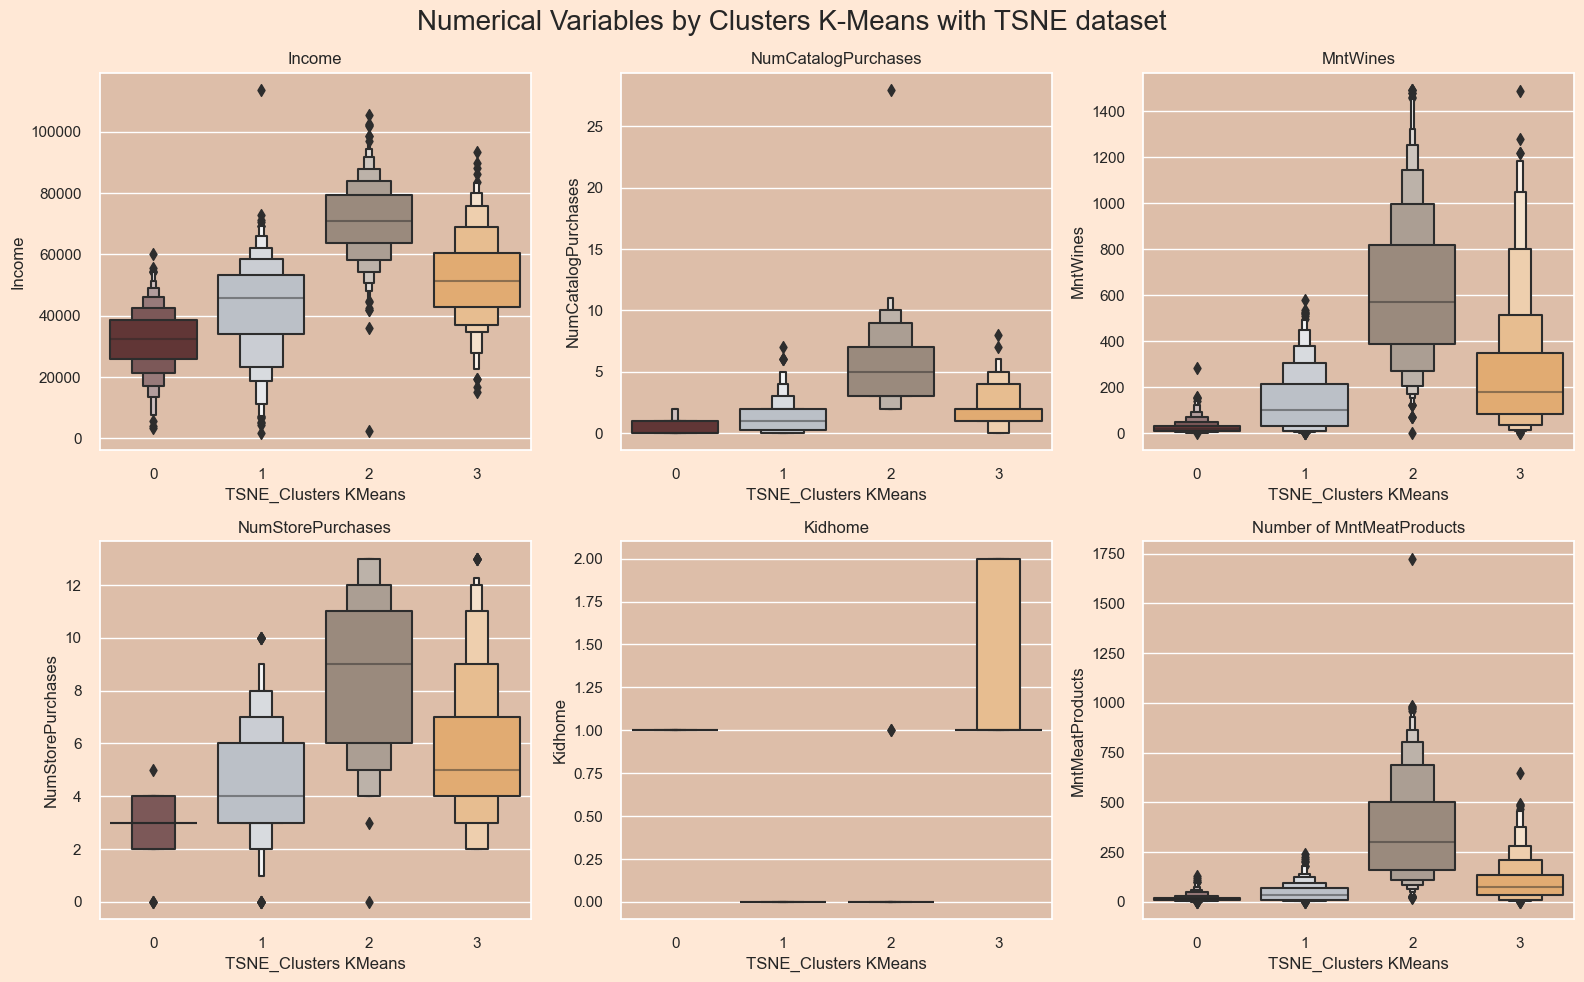

In [ ]:
# Create a figure with two subplots arranged in one row and two columns
fig, axes = plt.subplots(2, 3, figsize=(16, 10))  # Adjust the figsize as needed

# Add main title to the figure
fig.suptitle("Numerical Variables by Clusters K-Means with TSNE dataset", fontsize=20)

# Plotting the number of deals purchased by order value in the first subplot
sns.boxenplot(y=data_num_tsne["Income"], x=data_num_tsne["TSNE_Clusters KMeans"], palette=pal, ax=axes[0, 0])
axes[0, 0].set_title("Income")
axes[0, 0].set_xlabel("TSNE_Clusters KMeans")
axes[0, 0].set_ylabel("Income")

# Plotting the number of deals purchased by customer age in the second subplot
sns.boxenplot(y=data_num_tsne["NumCatalogPurchases"], x=data_num_tsne["TSNE_Clusters KMeans"], palette=pal, ax=axes[0, 1])
axes[0, 1].set_title("NumCatalogPurchases")
axes[0, 1].set_xlabel("TSNE_Clusters KMeans")
axes[0, 1].set_ylabel("NumCatalogPurchases")

# Plotting the number of deals purchased by customer age in the second subplot
sns.boxenplot(y=data_num_tsne["MntWines"], x=data_num_tsne["TSNE_Clusters KMeans"], palette=pal, ax=axes[0, 2])
axes[0, 2].set_title("MntWines")
axes[0, 2].set_xlabel("TSNE_Clusters KMeans")
axes[0, 2].set_ylabel("MntWines")

# Plotting the number of deals purchased by order value in the first subplot
sns.boxenplot(y=data_num_tsne["NumStorePurchases"], x=data_num_tsne["TSNE_Clusters KMeans"], palette=pal, ax=axes[1, 0])
axes[1, 0].set_title("NumStorePurchases")
axes[1, 0].set_xlabel("TSNE_Clusters KMeans")
axes[1, 0].set_ylabel("NumStorePurchases")

# Plotting the number of deals purchased by customer age in the second subplot
sns.boxenplot(y=data_num_tsne["Kidhome"], x=data_num_tsne["TSNE_Clusters KMeans"], palette=pal, ax=axes[1, 1])
axes[1, 1].set_title("Kidhome")
axes[1, 1].set_xlabel("TSNE_Clusters KMeans")
axes[1, 1].set_ylabel("Kidhome")

sns.boxenplot(y=data_num_tsne["MntMeatProducts"], x=data_num_tsne["TSNE_Clusters KMeans"], palette=pal, ax=axes[1, 2])
axes[1, 2].set_title("Number of MntMeatProducts")
axes[1, 2].set_xlabel("TSNE_Clusters KMeans")
axes[1, 2].set_ylabel("MntMeatProducts")


# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Display the plots
plt.show()

# viz con UMAP

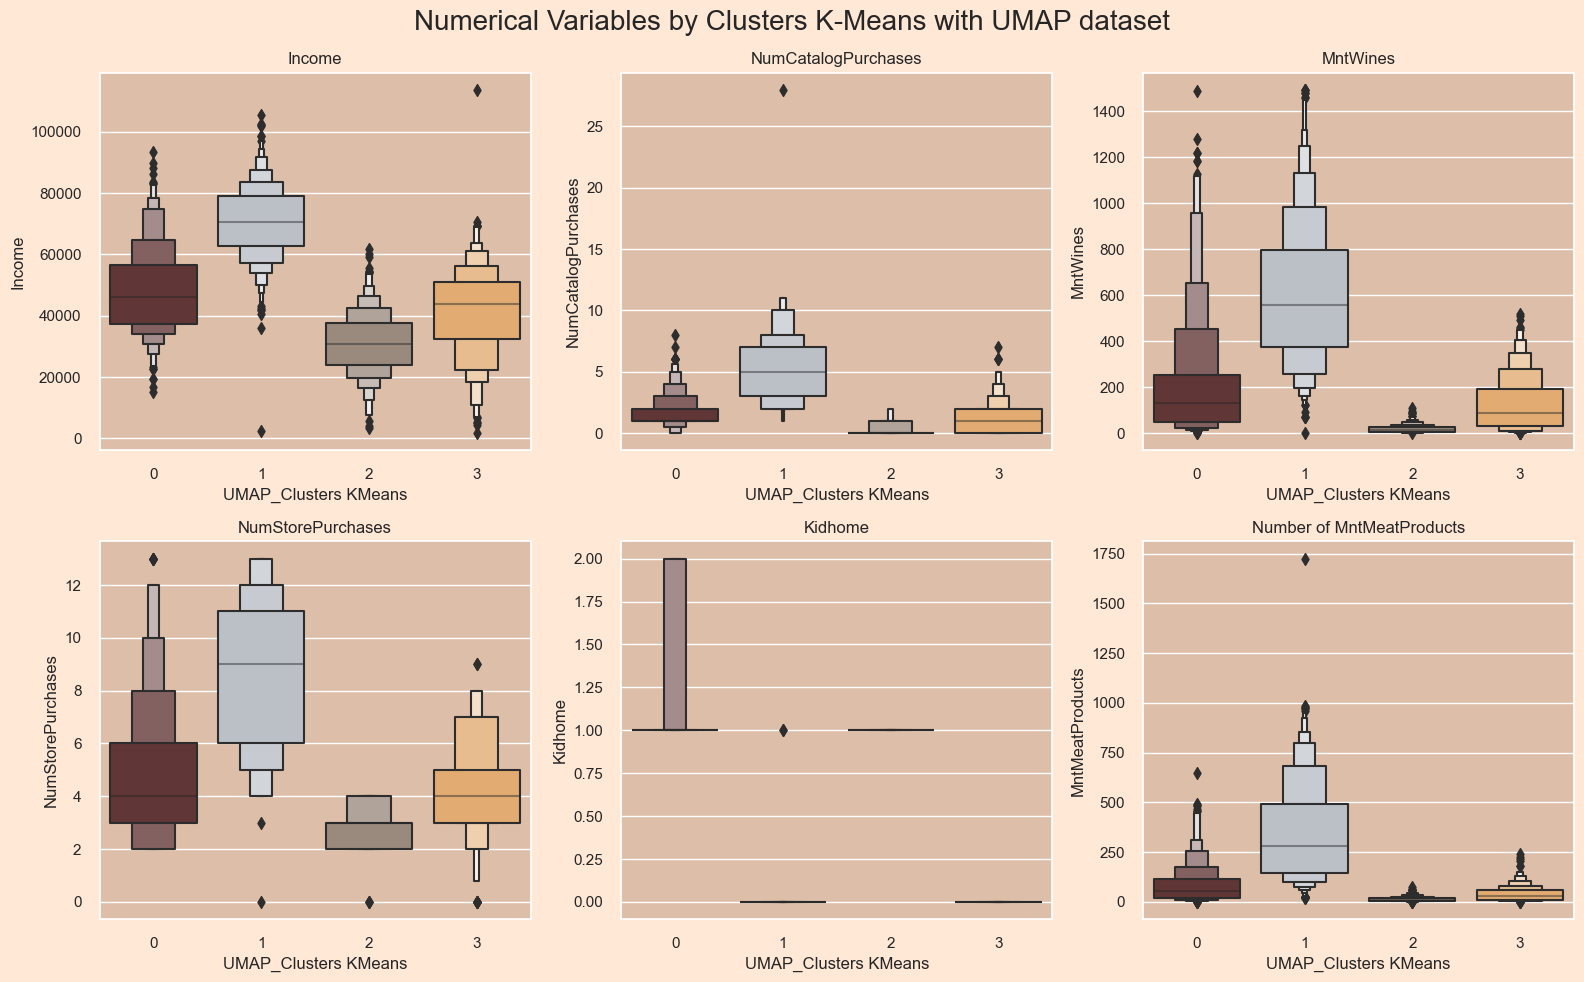

In [ ]:
# Create a figure with two subplots arranged in one row and two columns
fig, axes = plt.subplots(2, 3, figsize=(16, 10))  # Adjust the figsize as needed

# Add main title to the figure
fig.suptitle("Numerical Variables by Clusters K-Means with UMAP dataset", fontsize=20)

# Plotting the number of deals purchased by order value in the first subplot
sns.boxenplot(y=data_num_umap["Income"], x=data_num_umap["UMAP_Clusters KMeans"], palette=pal, ax=axes[0, 0])
axes[0, 0].set_title("Income")
axes[0, 0].set_xlabel("UMAP_Clusters KMeans")
axes[0, 0].set_ylabel("Income")

# Plotting the number of deals purchased by customer age in the second subplot
sns.boxenplot(y=data_num_umap["NumCatalogPurchases"], x=data_num_umap["UMAP_Clusters KMeans"], palette=pal, ax=axes[0, 1])
axes[0, 1].set_title("NumCatalogPurchases")
axes[0, 1].set_xlabel("UMAP_Clusters KMeans")
axes[0, 1].set_ylabel("NumCatalogPurchases")

# Plotting the number of deals purchased by customer age in the second subplot
sns.boxenplot(y=data_num_umap["MntWines"], x=data_num_umap["UMAP_Clusters KMeans"], palette=pal, ax=axes[0, 2])
axes[0, 2].set_title("MntWines")
axes[0, 2].set_xlabel("UMAP_Clusters KMeans")
axes[0, 2].set_ylabel("MntWines")

# Plotting the number of deals purchased by order value in the first subplot
sns.boxenplot(y=data_num_umap["NumStorePurchases"], x=data_num_umap["UMAP_Clusters KMeans"], palette=pal, ax=axes[1, 0])
axes[1, 0].set_title("NumStorePurchases")
axes[1, 0].set_xlabel("UMAP_Clusters KMeans")
axes[1, 0].set_ylabel("NumStorePurchases")

# Plotting the number of deals purchased by customer age in the second subplot
sns.boxenplot(y=data_num_umap["Kidhome"], x=data_num_umap["UMAP_Clusters KMeans"], palette=pal, ax=axes[1, 1])
axes[1, 1].set_title("Kidhome")
axes[1, 1].set_xlabel("UMAP_Clusters KMeans")
axes[1, 1].set_ylabel("Kidhome")

sns.boxenplot(y=data_num_umap["MntMeatProducts"], x=data_num_umap["UMAP_Clusters KMeans"], palette=pal, ax=axes[1, 2])
axes[1, 2].set_title("Number of MntMeatProducts")
axes[1, 2].set_xlabel("UMAP_Clusters KMeans")
axes[1, 2].set_ylabel("MntMeatProducts")


# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Display the plots
plt.show()

<a id="10"></a>
# <p style="background-color:#B7B7A4;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:5px 5px;">Positioning</p>

based on your clustering and targeting results, we can positioning a strategy like this:<br>

**Cluster 0 – Lower Income Segment**: "Discount-Oriented Value".  <br>
**Cluster 1 – Family-Oriented Segment**: "Family Focused Offers".  <br>
**Cluster 2 – Middle Ground**: "Upsell Opportunities".  <br>
**Cluster 3 – High Spenders**: "Premium Loyalty Programs".<br>

In [277]:
# Define the value position for each group of customers
value_positions = {
    0: "Lower_Income_Segment",
    1: "Family_Oriented_Segment",
    2: "Middle_Ground_Segment",
    3: "High_Spenders_Segment"
}

# Add a new column to the DataFrame with the value position for each customer based on their cluster
data['Value_Proposition'] = df_feature_selected_non_scaled['PCA_Clusters KMeans'].map(value_positions)
data['Value_Proposition'].head()

0      High_Spenders_Segment
1       Lower_Income_Segment
2    Family_Oriented_Segment
3       Lower_Income_Segment
4       Lower_Income_Segment
Name: Value_Proposition, dtype: object

<a id="9"></a>
# <p style="background-color:#B7B7A4;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:5px 5px;">Conclusion</p>

**CLUSTER 0 – Lower Income Segment**
- Lower income and spending across all product categories.
- High number of children, suggesting financial constraints and conservative spending habits.
- Likely to respond to discounts and offers on essential goods.
- Need to explore potential barriers like accessibility or product awareness.

**CLUSTER 1 – Family-Oriented Segment**
- Slightly lower income compared to Cluster 3 but more children in the household.
- Spending focused on family needs.
- Potential strategies include value for money, family bundles, and broad family-oriented promotions.

**CLUSTER 2 – Middle Ground**
- Middle ground in income and consumption patterns.
- Fewer children, suggesting more disposable income per capita.
- Moderate spending across categories with potential for upselling premium products or exploring new categories.

**CLUSTER 3 – High Spenders**
- Highest income and spending, particularly on high-value items like wine and meat.
- Active across multiple purchasing channels.
- Ideal targets for premium products and loyalty programs.

These insights help us tailor our marketing and product strategies to each segment's unique characteristics and needs.
